In [7]:
# Import Required Libraries
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path

print("✅ All required libraries imported successfully!")

✅ All required libraries imported successfully!


# New Sarborno Dataset Preprocessing
Processing the new Bangla sarborno dataset from NewDataset/sarbarno folder with P2Sign files

In [5]:
# Function to extract label from P2Sign filename (New Dataset)
def get_label_from_p2sign_filename(filename):
    """Extract appropriate label from P2Sign filename"""
    label_map = {
        'P2Sign00': 'অ',  # Including য় variant
        'P2Sign01': 'আ',
        'P2Sign02': 'ই',  # Including ঈ variant
        'P2Sign03': 'উ',  # Including ঊ variant
        'P2Sign04': 'ঋ',  # Including র,ড়,ঢ় variants
        'P2Sign05': 'এ',
        'P2Sign06': 'ঐ',
        'P2Sign07': 'ও',
        'P2Sign08': 'ঔ'
    }
    
    # Extract the P2SignXX part from the filename
    base_name = os.path.basename(filename)
    file_prefix = base_name.split('(')[0]
    
    return label_map.get(file_prefix.strip(), "Unknown")

# Process new sarborno dataset
new_sarborno_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset/sarbarno/'
new_csv_files = glob.glob(os.path.join(new_sarborno_path, '*.csv'))

print(f"Found {len(new_csv_files)} CSV files in the new sarborno directory")
print("New sarborno files to process:")
for file in sorted(new_csv_files):
    print(f"  - {os.path.basename(file)}")

# First, let's examine the structure of one file
if new_csv_files:
    sample_file = new_csv_files[0]
    sample_df = pd.read_csv(sample_file)
    print(f"\nSample file structure ({os.path.basename(sample_file)}):")
    print(f"Shape: {sample_df.shape}")
    print(f"Columns: {sample_df.columns.tolist()}")
    print(f"First few rows:")
    print(sample_df.head())

Found 9 CSV files in the new sarborno directory
New sarborno files to process:
  - P2Sign00(অ,য়)dataset.csv
  - P2Sign01(আ)dataset.csv
  - P2Sign02(ই,ঈ)dataset.csv
  - P2Sign03(উ,ঊ)dataset.csv
  - P2Sign04(ঋ,র,ড়,ঢ়)dataset.csv
  - P2Sign05(এ)dataset.csv
  - P2Sign06(ঐ)dataset.csv
  - P2Sign07(ও)dataset.csv
  - P2Sign08(ঔ)dataset.csv

Sample file structure (P2Sign05(এ)dataset.csv):
Shape: (512, 11)
Columns: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
First few rows:
      p1     p2     p3     p4     p5     r1     r2     r3     r4     r5 label
0  -4.14  43.45  41.65  28.57  16.72 -72.25   6.63  49.63  42.59  37.67     এ
1   1.54  49.61  48.44  34.04  20.62 -74.30   3.30  50.51  43.34  37.05     এ
2  -8.85  36.58  40.88  29.01  14.40 -88.06 -13.53  23.31  23.85  25.33     এ
3  -9.32  36.41  41.64  29.37  15.21 -88.31 -13.33  24.70  25.00  25.90     এ
4 -21.45  24.21  25.00  15.26   4.79 -80.38  -2.46  30.46  27.28  27.71     এ


In [6]:
# Process all new sarborno files
new_cleaned_datasets = []
new_processing_log = []

for file in sorted(new_csv_files):
    try:
        file_name = os.path.basename(file)
        print(f"\n📁 Processing: {file_name}")
        
        # 1. Load the data
        df = pd.read_csv(file)
        initial_shape = df.shape
        
        # 2. Check for missing values
        missing_before = df.isnull().sum().sum()
        print(f"   Initial shape: {initial_shape}, Missing values: {missing_before}")
        
        # 3. Handle missing values
        df.dropna(inplace=True)
        
        # 4. Add appropriate label
        label = get_label_from_p2sign_filename(file)
        df['label'] = label
        
        # 5. Keep only necessary columns (if they exist)
        standard_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
        available_columns = [col for col in standard_columns if col in df.columns]
        df_cleaned = df[available_columns]
        
        # 6. Verify cleaning results
        final_shape = df_cleaned.shape
        missing_after = df_cleaned.isnull().sum().sum()
        
        print(f"   Final shape: {final_shape}, Missing values: {missing_after}")
        print(f"   Assigned label: '{label}'")
        print(f"   Columns kept: {available_columns}")
        
        # 7. Save the cleaned data back to the file
        df_cleaned.to_csv(file, index=False)
        
        # 8. Add to combined dataset
        new_cleaned_datasets.append(df_cleaned)
        
        # Log the processing
        new_processing_log.append({
            'file': file_name,
            'initial_rows': initial_shape[0],
            'final_rows': final_shape[0],
            'rows_removed': initial_shape[0] - final_shape[0],
            'missing_before': missing_before,
            'label': label,
            'columns_kept': len(available_columns)
        })
        
        print(f"   ✅ Processed and saved successfully!")
        
    except Exception as e:
        print(f"   ❌ Error processing {file}: {str(e)}")

print(f"\n🎉 New sarborno processing completed! {len(new_cleaned_datasets)} files processed successfully.")

# Display processing summary
if new_processing_log:
    new_summary_df = pd.DataFrame(new_processing_log)
    print("\nNew Sarborno Processing Summary:")
    print(new_summary_df)


📁 Processing: P2Sign00(অ,য়)dataset.csv
   Initial shape: (597, 11), Missing values: 0
   Final shape: (597, 11), Missing values: 0
   Assigned label: 'অ'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed and saved successfully!

📁 Processing: P2Sign01(আ)dataset.csv
   Initial shape: (343, 11), Missing values: 0
   Final shape: (343, 11), Missing values: 0
   Assigned label: 'আ'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed and saved successfully!

📁 Processing: P2Sign02(ই,ঈ)dataset.csv
   Initial shape: (487, 11), Missing values: 0
   Final shape: (487, 11), Missing values: 0
   Assigned label: 'ই'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed and saved successfully!

📁 Processing: P2Sign03(উ,ঊ)dataset.csv
   Initial shape: (416, 11), Missing values: 0
   Final shape: (416, 11), Missing values: 0
   Assigned label: 'উ'
   C

In [6]:
# Combine new sarborno datasets
if new_cleaned_datasets:
    new_combined_df = pd.concat(new_cleaned_datasets, ignore_index=True)
    
    print(f"\n📊 New Sarborno Combined Dataset Statistics:")
    print(f"Total samples: {len(new_combined_df)}")
    print(f"Total features: {new_combined_df.shape[1]}")
    
    print("\nLabel distribution:")
    new_label_counts = new_combined_df['label'].value_counts().sort_index()
    print(new_label_counts)
    
    print(f"\nMissing values in new combined dataset:")
    print(new_combined_df.isnull().sum())
    
    # Save new combined dataset
    new_output_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    new_combined_df.to_csv(new_output_file, index=False)
    print(f"\n💾 Saved new sarborno combined dataset to: {new_output_file}")
    
    # Display first few rows
    print("\nFirst 5 rows of new sarborno dataset:")
    print(new_combined_df.head())
    
    # Display dataset info
    print("\nDataset Info:")
    print(f"Columns: {new_combined_df.columns.tolist()}")
    print(f"Data types:")
    print(new_combined_df.dtypes)
    
else:
    print("❌ No new sarborno datasets were successfully processed!")


📊 New Sarborno Combined Dataset Statistics:
Total samples: 4320
Total features: 11

Label distribution:
label
অ    597
আ    343
ই    487
উ    416
ঋ    427
এ    512
ঐ    527
ও    509
ঔ    502
Name: count, dtype: int64

Missing values in new combined dataset:
p1       0
p2       0
p3       0
p4       0
p5       0
r1       0
r2       0
r3       0
r4       0
r5       0
label    0
dtype: int64

💾 Saved new sarborno combined dataset to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv

First 5 rows of new sarborno dataset:
     p1    p2    p3    p4    p5     r1     r2    r3     r4     r5 label
0 -2.48 -6.39  1.10 -3.82 -7.33 -88.17 -21.17 -1.14  12.70  16.72     অ
1 -0.86 -6.99  0.33 -4.44 -7.68 -88.85 -20.75 -0.59  13.31  16.48     অ
2 -0.82 -7.64  0.34 -4.28 -7.57 -88.38 -20.95 -0.99  13.02  16.20     অ
3 -0.48 -6.83  0.80 -3.75 -7.10 -87.37 -19.36  0.68  14.26  17.29     অ
4 -0.69 -6.89  0.65 -4.21 -7.26 -86.80 -18.96  1.17  14.40  17.26     অ

Dat

In [7]:
# Create comprehensive combined dataset (Old + New)
# Combine old sarborno, bangonbarna, and new sarborno datasets

print("🔄 Creating comprehensive combined dataset...")

# Load existing datasets
try:
    # Load old bangonbarna if exists
    bangonbarna_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/bangonbarna_cleaned_combined.csv'
    if os.path.exists(bangonbarna_file):
        bangonbarna_df = pd.read_csv(bangonbarna_file)
        print(f"✅ Loaded bangonbarna dataset: {bangonbarna_df.shape}")
    else:
        print("⚠️ Bangonbarna combined file not found")
        bangonbarna_df = pd.DataFrame()
    
    # Load old sarborno from fullBanglacombined_dataset if exists
    full_bangla_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/fullBanglacombined_dataset.csv'
    if os.path.exists(full_bangla_file):
        full_bangla_df = pd.read_csv(full_bangla_file)
        print(f"✅ Loaded full bangla dataset: {full_bangla_df.shape}")
    else:
        print("⚠️ Full bangla combined file not found")
        full_bangla_df = pd.DataFrame()
    
    # Combine all datasets
    all_datasets = []
    
    if not bangonbarna_df.empty:
        all_datasets.append(bangonbarna_df)
        print(f"Added bangonbarna: {bangonbarna_df.shape[0]} samples")
    
    if not full_bangla_df.empty:
        all_datasets.append(full_bangla_df)
        print(f"Added full bangla: {full_bangla_df.shape[0]} samples")
    
    if new_cleaned_datasets:
        all_datasets.extend(new_cleaned_datasets)
        new_samples = sum(len(df) for df in new_cleaned_datasets)
        print(f"Added new sarborno: {new_samples} samples")
    
    if all_datasets:
        # Ensure all datasets have same columns
        all_columns = set()
        for df in all_datasets:
            all_columns.update(df.columns)
        
        # Standardize columns for all datasets
        standardized_datasets = []
        for df in all_datasets:
            df_copy = df.copy()
            for col in all_columns:
                if col not in df_copy.columns:
                    df_copy[col] = None
            standardized_datasets.append(df_copy[sorted(all_columns)])
        
        # Combine all
        ultimate_combined_df = pd.concat(standardized_datasets, ignore_index=True)
        
        print(f"\n🎯 ULTIMATE COMBINED DATASET:")
        print(f"Total samples: {len(ultimate_combined_df)}")
        print(f"Total features: {ultimate_combined_df.shape[1]}")
        
        # Label distribution
        print("\nComplete label distribution:")
        ultimate_label_counts = ultimate_combined_df['label'].value_counts().sort_index()
        print(ultimate_label_counts)
        
        # Save ultimate combined dataset
        ultimate_output_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv'
        ultimate_combined_df.to_csv(ultimate_output_file, index=False)
        print(f"\n💾 Saved ultimate combined dataset to: {ultimate_output_file}")
        
        print(f"\nDataset summary:")
        print(f"- Total unique labels: {ultimate_combined_df['label'].nunique()}")
        print(f"- Missing values: {ultimate_combined_df.isnull().sum().sum()}")
        print(f"- Columns: {ultimate_combined_df.columns.tolist()}")
        
    else:
        print("❌ No datasets found to combine!")
        
except Exception as e:
    print(f"❌ Error creating combined dataset: {str(e)}")

🔄 Creating comprehensive combined dataset...
⚠️ Bangonbarna combined file not found
⚠️ Full bangla combined file not found
Added new sarborno: 4320 samples

🎯 ULTIMATE COMBINED DATASET:
Total samples: 4320
Total features: 11

Complete label distribution:
label
অ    597
আ    343
ই    487
উ    416
ঋ    427
এ    512
ঐ    527
ও    509
ঔ    502
Name: count, dtype: int64

💾 Saved ultimate combined dataset to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv

Dataset summary:
- Total unique labels: 9
- Missing values: 0
- Columns: ['label', 'p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']


# Null Value Visualization for NewDataset Sarborno
Comprehensive visualization of missing/null values in the cleaned sarborno dataset

In [8]:
# Load necessary libraries for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load the NewDataset sarborno cleaned combined dataset
file_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'

print("📊 Loading NewDataset Sarborno dataset for null value analysis...")

try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📈 Dataset shape: {df.shape}")
    print(f"📋 Columns: {df.columns.tolist()}")
    
    # Basic info about the dataset
    print(f"\n📊 BASIC DATASET INFO:")
    print(f"   • Total rows: {len(df):,}")
    print(f"   • Total columns: {len(df.columns)}")
    print(f"   • Data types:")
    for col, dtype in df.dtypes.items():
        print(f"     - {col}: {dtype}")
        
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    print("Please make sure the file exists or run the preprocessing steps first.")
except Exception as e:
    print(f"❌ Error loading file: {str(e)}")

📊 Loading NewDataset Sarborno dataset for null value analysis...
✅ Dataset loaded successfully!
📈 Dataset shape: (22507, 11)
📋 Columns: ['label', 'p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']

📊 BASIC DATASET INFO:
   • Total rows: 22,507
   • Total columns: 11
   • Data types:
     - label: object
     - p1: float64
     - p2: float64
     - p3: float64
     - p4: float64
     - p5: float64
     - r1: float64
     - r2: float64
     - r3: float64
     - r4: float64
     - r5: float64


In [9]:
# Comprehensive Null Value Analysis
if 'df' in locals() and not df.empty:
    print("🔍 COMPREHENSIVE NULL VALUE ANALYSIS")
    print("=" * 50)
    
    # 1. Overall null value summary
    total_cells = df.shape[0] * df.shape[1]
    total_nulls = df.isnull().sum().sum()
    null_percentage = (total_nulls / total_cells) * 100
    
    print(f"\n📊 OVERALL SUMMARY:")
    print(f"   • Total cells in dataset: {total_cells:,}")
    print(f"   • Total null values: {total_nulls:,}")
    print(f"   • Overall null percentage: {null_percentage:.2f}%")
    
    # 2. Null values per column
    null_counts = df.isnull().sum()
    null_percentages = (df.isnull().sum() / len(df)) * 100
    
    print(f"\n📋 NULL VALUES PER COLUMN:")
    print("-" * 40)
    for col in df.columns:
        null_count = null_counts[col]
        null_pct = null_percentages[col]
        status = "✅" if null_count == 0 else "⚠️" if null_pct < 5 else "❌"
        print(f"   {status} {col:12} | {null_count:6,} nulls ({null_pct:5.2f}%)")
    
    # 3. Columns with no null values
    clean_columns = null_counts[null_counts == 0].index.tolist()
    dirty_columns = null_counts[null_counts > 0].index.tolist()
    
    print(f"\n✅ CLEAN COLUMNS (No nulls): {len(clean_columns)}")
    if clean_columns:
        print(f"   {clean_columns}")
    
    print(f"\n⚠️ COLUMNS WITH NULLS: {len(dirty_columns)}")
    if dirty_columns:
        print(f"   {dirty_columns}")
    
    # 4. Rows with any null values
    rows_with_nulls = df.isnull().any(axis=1).sum()
    complete_rows = len(df) - rows_with_nulls
    
    print(f"\n📊 ROW COMPLETENESS:")
    print(f"   • Complete rows (no nulls): {complete_rows:,} ({(complete_rows/len(df)*100):.2f}%)")
    print(f"   • Rows with nulls: {rows_with_nulls:,} ({(rows_with_nulls/len(df)*100):.2f}%)")

else:
    print("❌ No dataset loaded for analysis")

🔍 COMPREHENSIVE NULL VALUE ANALYSIS

📊 OVERALL SUMMARY:
   • Total cells in dataset: 47,520
   • Total null values: 0
   • Overall null percentage: 0.00%

📋 NULL VALUES PER COLUMN:
----------------------------------------
   ✅ p1           |      0 nulls ( 0.00%)
   ✅ p2           |      0 nulls ( 0.00%)
   ✅ p3           |      0 nulls ( 0.00%)
   ✅ p4           |      0 nulls ( 0.00%)
   ✅ p5           |      0 nulls ( 0.00%)
   ✅ r1           |      0 nulls ( 0.00%)
   ✅ r2           |      0 nulls ( 0.00%)
   ✅ r3           |      0 nulls ( 0.00%)
   ✅ r4           |      0 nulls ( 0.00%)
   ✅ r5           |      0 nulls ( 0.00%)
   ✅ label        |      0 nulls ( 0.00%)

✅ CLEAN COLUMNS (No nulls): 11
   ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']

⚠️ COLUMNS WITH NULLS: 0

📊 ROW COMPLETENESS:
   • Complete rows (no nulls): 4,320 (100.00%)
   • Rows with nulls: 0 (0.00%)


🎨 Creating comprehensive null value visualizations...


/tmp/ipykernel_27331/4240286830.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  label_nulls = df.groupby('label').apply(lambda x: x.isnull().sum().sum())
/tmp/ipykernel_27331/4240286830.py:100: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_27331/4240286830.py:100: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/tmp/ipykernel_27331/4240286830.py:100: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_27331/4240286830.py:100: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from font(s) Liberation Sans.
  p

📊 Visualization saved to: /home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_Sarborno_Null_Analysis.png


/home/meraj/PycharmProjects/JupyterProject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meraj/PycharmProjects/JupyterProject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meraj/PycharmProjects/JupyterProject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meraj/PycharmProjects/JupyterProject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meraj/PycharmProjects/JupyterProject/.venv/lib/python3.12/sit

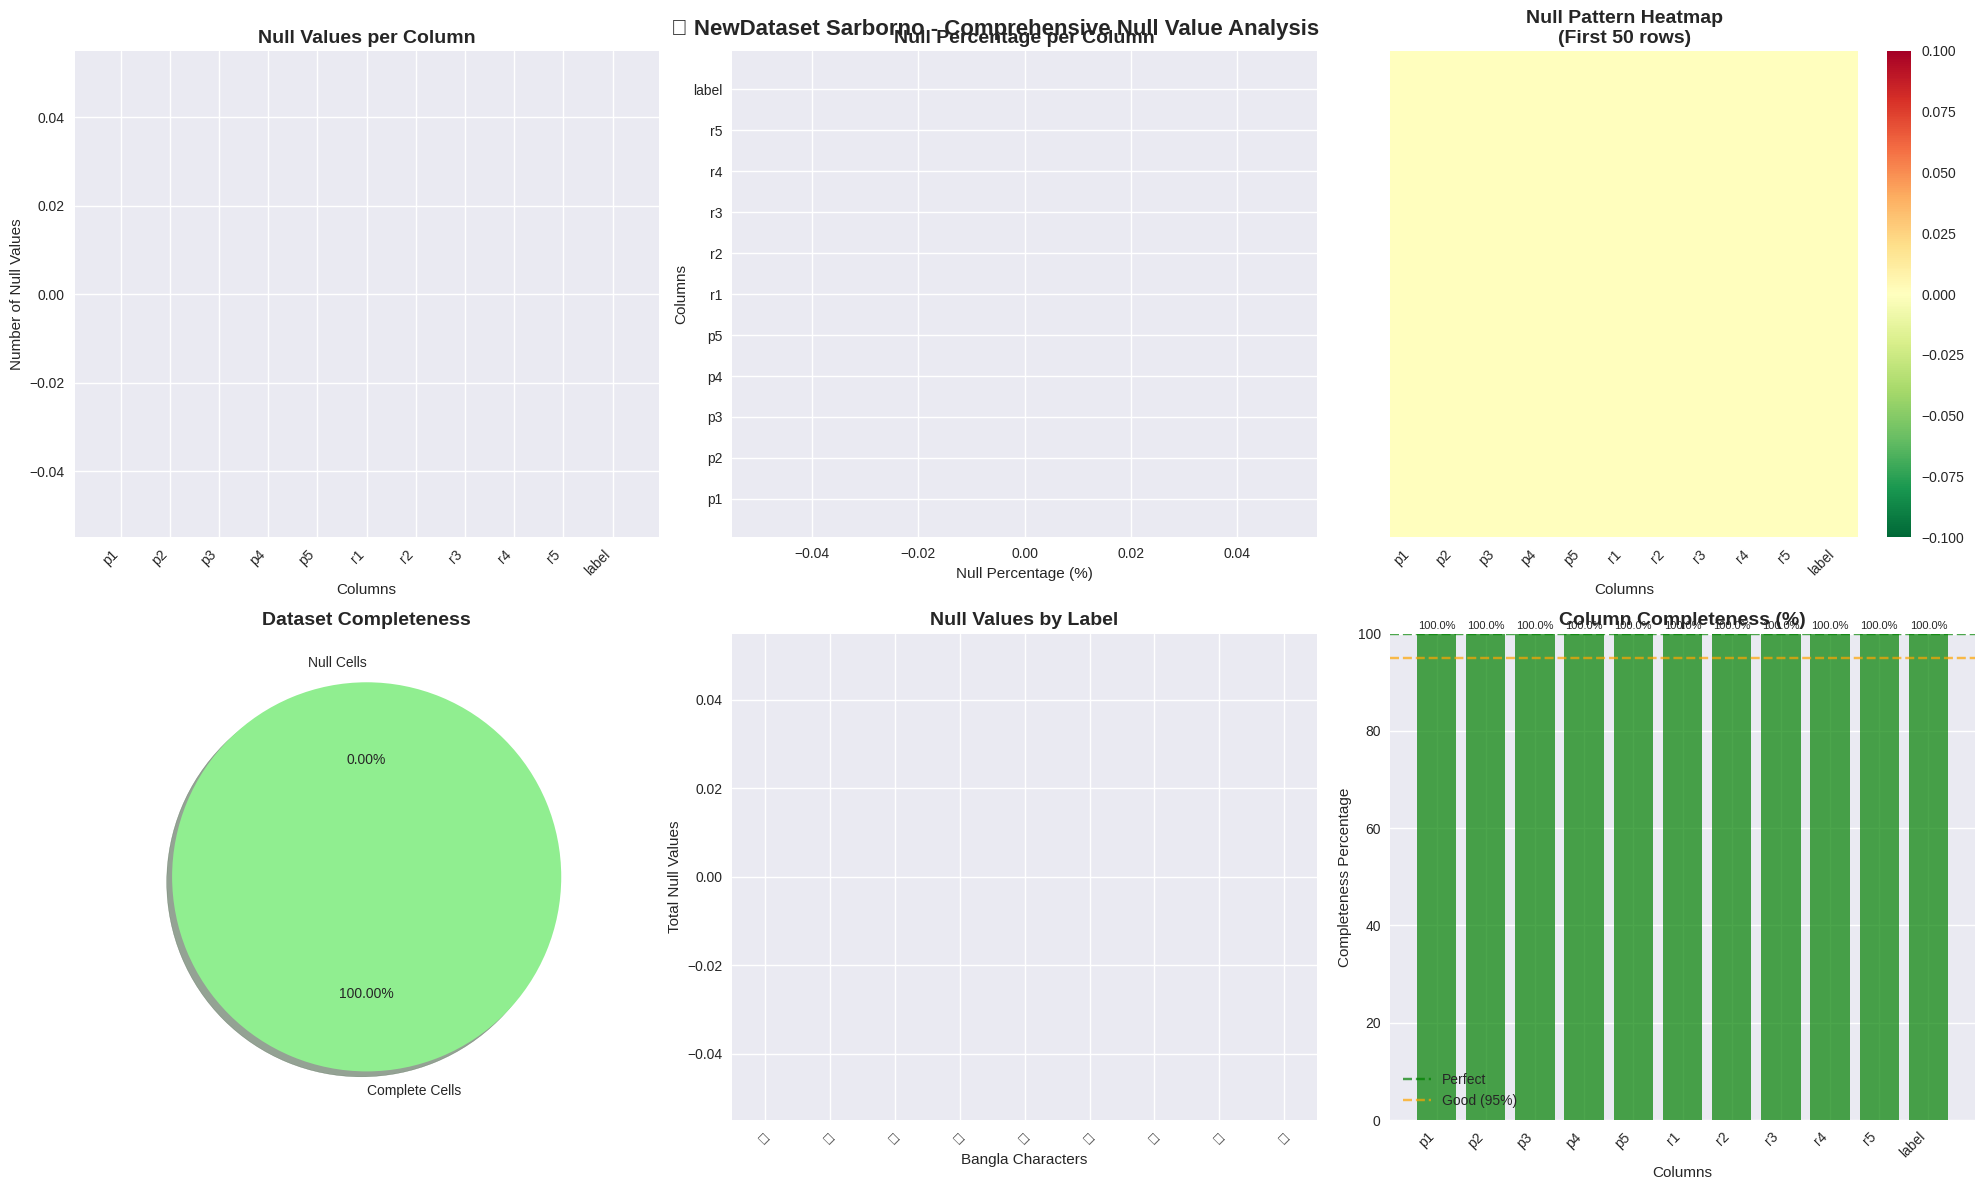

In [10]:
# Create Professional Null Value Visualizations
if 'df' in locals() and not df.empty:
    print("🎨 Creating comprehensive null value visualizations...")
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Null count per column (Bar plot)
    plt.subplot(2, 3, 1)
    null_counts = df.isnull().sum()
    colors = ['red' if count > 0 else 'green' for count in null_counts]
    bars = plt.bar(range(len(null_counts)), null_counts.values, color=colors, alpha=0.7)
    plt.title('Null Values per Column', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.xticks(range(len(null_counts)), null_counts.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars, null_counts.values):
        if value > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    str(int(value)), ha='center', va='bottom', fontweight='bold')
    
    # 2. Null percentage per column (Horizontal bar plot)
    plt.subplot(2, 3, 2)
    null_percentages = (df.isnull().sum() / len(df)) * 100
    colors = ['red' if pct > 0 else 'green' for pct in null_percentages]
    plt.barh(range(len(null_percentages)), null_percentages.values, color=colors, alpha=0.7)
    plt.title('Null Percentage per Column', fontsize=14, fontweight='bold')
    plt.xlabel('Null Percentage (%)')
    plt.ylabel('Columns')
    plt.yticks(range(len(null_percentages)), null_percentages.index)
    
    # Add percentage labels
    for i, pct in enumerate(null_percentages.values):
        if pct > 0:
            plt.text(pct + 0.1, i, f'{pct:.1f}%', va='center', fontweight='bold')
    
    # 3. Heatmap of null values (sample)
    plt.subplot(2, 3, 3)
    # Show heatmap of first 50 rows for visibility
    sample_size = min(50, len(df))
    null_matrix = df.head(sample_size).isnull()
    sns.heatmap(null_matrix, cbar=True, cmap='RdYlGn_r', 
                yticklabels=False, xticklabels=True)
    plt.title(f'Null Pattern Heatmap\n(First {sample_size} rows)', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    
    # 4. Overall completeness pie chart
    plt.subplot(2, 3, 4)
    total_cells = df.shape[0] * df.shape[1]
    total_nulls = df.isnull().sum().sum()
    complete_cells = total_cells - total_nulls
    
    sizes = [complete_cells, total_nulls]
    labels = ['Complete Cells', 'Null Cells']
    colors = ['lightgreen', 'lightcoral']
    explode = (0, 0.1) if total_nulls > 0 else (0, 0)
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', 
            startangle=90, explode=explode, shadow=True)
    plt.title('Dataset Completeness', fontsize=14, fontweight='bold')
    
    # 5. Null values by label (if label column exists)
    plt.subplot(2, 3, 5)
    if 'label' in df.columns:
        label_nulls = df.groupby('label').apply(lambda x: x.isnull().sum().sum())
        label_nulls.plot(kind='bar', color='skyblue', alpha=0.7)
        plt.title('Null Values by Label', fontsize=14, fontweight='bold')
        plt.xlabel('Bangla Characters')
        plt.ylabel('Total Null Values')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, 'No Label Column\nFound', ha='center', va='center', 
                transform=plt.gca().transAxes, fontsize=12)
        plt.title('Label Analysis', fontsize=14, fontweight='bold')
    
    # 6. Column completeness summary
    plt.subplot(2, 3, 6)
    completeness = (1 - (df.isnull().sum() / len(df))) * 100
    colors = ['green' if comp == 100 else 'orange' if comp >= 95 else 'red' for comp in completeness]
    bars = plt.bar(range(len(completeness)), completeness.values, color=colors, alpha=0.7)
    plt.title('Column Completeness (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.ylabel('Completeness Percentage')
    plt.xticks(range(len(completeness)), completeness.index, rotation=45, ha='right')
    plt.ylim(0, 100)
    
    # Add horizontal line at 100%
    plt.axhline(y=100, color='green', linestyle='--', alpha=0.7, label='Perfect')
    plt.axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='Good (95%)')
    plt.legend()
    
    # Add percentage labels on bars
    for bar, value in zip(bars, completeness.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.suptitle('🔍 NewDataset Sarborno - Comprehensive Null Value Analysis', 
                fontsize=16, fontweight='bold', y=0.98)
    
    # Save the plot
    output_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_Sarborno_Null_Analysis.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"📊 Visualization saved to: {output_path}")
    
    plt.show()
    
else:
    print("❌ No dataset available for visualization")

In [11]:
# Detailed Null Value Matrix Analysis
if 'df' in locals() and not df.empty:
    print("🔬 DETAILED NULL VALUE MATRIX ANALYSIS")
    print("=" * 50)
    
    # Create detailed null analysis
    null_info = pd.DataFrame({
        'Column': df.columns,
        'Null_Count': df.isnull().sum().values,
        'Null_Percentage': (df.isnull().sum() / len(df) * 100).values,
        'Non_Null_Count': df.count().values,
        'Data_Type': df.dtypes.values
    })
    
    null_info['Completeness'] = 100 - null_info['Null_Percentage']
    null_info['Status'] = null_info['Null_Percentage'].apply(
        lambda x: '✅ Perfect' if x == 0 else '⚠️ Good' if x < 5 else '❌ Poor'
    )
    
    print("\n📋 DETAILED NULL VALUE REPORT:")
    print("-" * 80)
    print(null_info.to_string(index=False))
    
    # Find patterns in null values
    print(f"\n🔍 NULL VALUE PATTERNS:")
    print("-" * 30)
    
    # Check if there are any rows that are completely null
    completely_null_rows = df.isnull().all(axis=1).sum()
    print(f"• Completely null rows: {completely_null_rows}")
    
    # Check for rows with most nulls
    if df.isnull().any().any():  # If there are any nulls
        nulls_per_row = df.isnull().sum(axis=1)
        max_nulls_per_row = nulls_per_row.max()
        rows_with_max_nulls = (nulls_per_row == max_nulls_per_row).sum()
        print(f"• Maximum nulls in any row: {max_nulls_per_row}")
        print(f"• Rows with maximum nulls: {rows_with_max_nulls}")
        
        # Show distribution of null counts per row
        null_dist = nulls_per_row.value_counts().sort_index()
        print(f"\n📊 Distribution of null counts per row:")
        for null_count, frequency in null_dist.items():
            print(f"   {null_count} nulls: {frequency:,} rows")
    
    # Check for columns that are always null together
    if len([col for col in df.columns if df[col].isnull().any()]) > 1:
        print(f"\n🔗 CORRELATION BETWEEN NULL VALUES:")
        null_corr = df.isnull().corr()
        high_corr_pairs = []
        for i in range(len(null_corr.columns)):
            for j in range(i+1, len(null_corr.columns)):
                corr_val = null_corr.iloc[i, j]
                if abs(corr_val) > 0.5:  # High correlation
                    col1, col2 = null_corr.columns[i], null_corr.columns[j]
                    high_corr_pairs.append((col1, col2, corr_val))
        
        if high_corr_pairs:
            print("High correlation between null patterns:")
            for col1, col2, corr in high_corr_pairs:
                print(f"   • {col1} ↔ {col2}: {corr:.3f}")
        else:
            print("   • No high correlations found between null patterns")
    
    # Summary and recommendations
    print(f"\n💡 RECOMMENDATIONS:")
    print("-" * 20)
    
    total_null_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    
    if total_null_pct == 0:
        print("🎉 Excellent! Your dataset has no missing values.")
        print("   • Dataset is ready for machine learning")
        print("   • No data cleaning required for null values")
    elif total_null_pct < 5:
        print("✅ Good data quality - minimal missing values")
        print("   • Consider keeping the dataset as is")
        print("   • Or apply simple imputation if needed")
    elif total_null_pct < 20:
        print("⚠️ Moderate missing data - requires attention")
        print("   • Consider imputation strategies")
        print("   • Analyze patterns in missing data")
    else:
        print("❌ High missing data percentage")
        print("   • Investigate data collection process")
        print("   • Consider advanced imputation methods")
        print("   • May need additional data collection")
    
    # Save detailed report
    report_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_Sarborno_Null_Report.csv'
    null_info.to_csv(report_path, index=False)
    print(f"\n💾 Detailed null analysis saved to: {report_path}")

else:
    print("❌ No dataset available for detailed analysis")

🔬 DETAILED NULL VALUE MATRIX ANALYSIS

📋 DETAILED NULL VALUE REPORT:
--------------------------------------------------------------------------------
Column  Null_Count  Null_Percentage  Non_Null_Count Data_Type  Completeness    Status
    p1           0              0.0            4320   float64         100.0 ✅ Perfect
    p2           0              0.0            4320   float64         100.0 ✅ Perfect
    p3           0              0.0            4320   float64         100.0 ✅ Perfect
    p4           0              0.0            4320   float64         100.0 ✅ Perfect
    p5           0              0.0            4320   float64         100.0 ✅ Perfect
    r1           0              0.0            4320   float64         100.0 ✅ Perfect
    r2           0              0.0            4320   float64         100.0 ✅ Perfect
    r3           0              0.0            4320   float64         100.0 ✅ Perfect
    r4           0              0.0            4320   float64         100.0 

In [12]:
# Interactive Null Value Exploration
if 'df' in locals() and not df.empty:
    print("🔍 INTERACTIVE NULL VALUE EXPLORATION")
    print("=" * 45)
    
    # Function to explore specific columns
    def explore_column_nulls(column_name):
        if column_name in df.columns:
            col_data = df[column_name]
            null_count = col_data.isnull().sum()
            null_pct = (null_count / len(col_data)) * 100
            
            print(f"\n📊 Column: {column_name}")
            print(f"   • Null count: {null_count:,}")
            print(f"   • Null percentage: {null_pct:.2f}%")
            print(f"   • Data type: {col_data.dtype}")
            
            if null_count > 0:
                print(f"   • First null positions: {col_data[col_data.isnull()].index[:5].tolist()}")
                
                # Show context around null values
                null_indices = col_data[col_data.isnull()].index
                if len(null_indices) > 0:
                    sample_idx = null_indices[0]
                    start_idx = max(0, sample_idx - 2)
                    end_idx = min(len(df), sample_idx + 3)
                    print(f"\n   📋 Context around first null (rows {start_idx}-{end_idx}):")
                    print(df.loc[start_idx:end_idx, column_name].to_string())
            else:
                print("   ✅ No null values in this column!")
        else:
            print(f"❌ Column '{column_name}' not found!")
    
    # Explore each column
    print("\n🔍 EXPLORING EACH COLUMN:")
    for col in df.columns:
        explore_column_nulls(col)
    
    # Overall dataset health check
    print(f"\n🏥 DATASET HEALTH CHECK:")
    print("-" * 25)
    
    # Calculate health score
    total_cells = len(df) * len(df.columns)
    null_cells = df.isnull().sum().sum()
    health_score = ((total_cells - null_cells) / total_cells) * 100
    
    print(f"📊 Health Score: {health_score:.2f}%")
    
    if health_score >= 99:
        health_status = "🟢 EXCELLENT"
        recommendation = "Dataset is in perfect condition!"
    elif health_score >= 95:
        health_status = "🟡 GOOD"
        recommendation = "Minor cleaning may be needed"
    elif health_score >= 80:
        health_status = "🟠 FAIR" 
        recommendation = "Moderate cleaning required"
    else:
        health_status = "🔴 POOR"
        recommendation = "Significant data cleaning needed"
    
    print(f"🎯 Status: {health_status}")
    print(f"💡 Recommendation: {recommendation}")
    
    # Quick statistics
    print(f"\n📈 QUICK STATISTICS:")
    print(f"   • Total samples: {len(df):,}")
    print(f"   • Total features: {len(df.columns)}")
    print(f"   • Complete rows: {len(df.dropna()):,}")
    print(f"   • Rows with any nulls: {len(df) - len(df.dropna()):,}")
    
    if 'label' in df.columns:
        print(f"   • Unique labels: {df['label'].nunique()}")
        print(f"   • Labels: {sorted(df['label'].unique())}")
    
    print(f"\n✅ Null value analysis complete!")

else:
    print("❌ Dataset not loaded. Please run the data loading cell first.")

🔍 INTERACTIVE NULL VALUE EXPLORATION

🔍 EXPLORING EACH COLUMN:

📊 Column: p1
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: p2
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: p3
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: p4
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: p5
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: r1
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: r2
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ No null values in this column!

📊 Column: r3
   • Null count: 0
   • Null percentage: 0.00%
   • Data type: float64
   ✅ 

# Special Character Dataset Processing
Processing P2_Space.csv and P2_fullStop.csv from NewDataset/specialcharacter folder

In [9]:
# Function to extract label from P2 special character filename
def get_label_from_p2_special_filename(filename):
    """Extract appropriate label from P2 special character filename"""
    label_map = {
        'P2_Space': ' ',           # Space character
        'P2_fullStop': '|'         # Full stop/period (dari)
    }
    
    # Extract the P2_XXX part from the filename
    base_name = os.path.basename(filename)
    file_prefix = base_name.split('.')[0]  # Remove .csv extension
    
    return label_map.get(file_prefix.strip(), "Unknown")

# Process special character dataset
special_char_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset/specialcharacter/'
special_csv_files = glob.glob(os.path.join(special_char_path, '*.csv'))

print(f"🔍 Found {len(special_csv_files)} CSV files in the special character directory")
print("Special character files to process:")
for file in sorted(special_csv_files):
    print(f"  - {os.path.basename(file)}")

# First, let's examine the structure of special character files
if special_csv_files:
    sample_file = special_csv_files[0]
    sample_df = pd.read_csv(sample_file)
    print(f"\nSample special character file structure ({os.path.basename(sample_file)}):")
    print(f"Shape: {sample_df.shape}")
    print(f"Columns: {sample_df.columns.tolist()}")
    print(f"First few rows:")
    print(sample_df.head())
    print(f"\nData types:")
    print(sample_df.dtypes)

🔍 Found 2 CSV files in the special character directory
Special character files to process:
  - P2_Space.csv
  - P2_fullStop.csv

Sample special character file structure (P2_Space.csv):
Shape: (557, 11)
Columns: ['serial', 'p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
First few rows:
   serial     p1     p2    p3    p4     p5     r1     r2     r3     r4     r5
0       1 -13.91 -16.31  8.28  2.17  17.08 -25.30  55.19  84.72  78.54  81.26
1       2 -14.68 -14.39  7.82  1.82  15.50 -27.34  52.47  82.61  76.31  79.49
2       3 -13.32 -13.41  8.52  2.33  16.46 -26.56  51.76  83.18  77.14  80.32
3       4 -13.63 -13.06  7.87  1.60  15.86 -25.97  52.34  84.06  77.82  81.27
4       5 -16.42 -16.90  4.39 -1.06  12.40 -28.44  53.23  81.56  74.86  78.69

Data types:
serial      int64
p1        float64
p2        float64
p3        float64
p4        float64
p5        float64
r1        float64
r2        float64
r3        float64
r4        float64
r5        float64
dtype: object


In [10]:
# Process all special character files
special_cleaned_datasets = []
special_processing_log = []

for file in sorted(special_csv_files):
    try:
        file_name = os.path.basename(file)
        print(f"\n📁 Processing: {file_name}")
        
        # 1. Load the data
        df = pd.read_csv(file)
        initial_shape = df.shape
        
        # 2. Check for missing values
        missing_before = df.isnull().sum().sum()
        print(f"   Initial shape: {initial_shape}, Missing values: {missing_before}")
        
        # 3. Handle missing values
        df.dropna(inplace=True)
        
        # 4. Add appropriate label
        label = get_label_from_p2_special_filename(file)
        df['label'] = label
        
        # 5. Keep only necessary columns (if they exist)
        standard_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
        available_columns = [col for col in standard_columns if col in df.columns]
        df_cleaned = df[available_columns]
        
        # 6. Verify cleaning results
        final_shape = df_cleaned.shape
        missing_after = df_cleaned.isnull().sum().sum()
        
        print(f"   Final shape: {final_shape}, Missing values: {missing_after}")
        print(f"   Assigned label: '{label}'")
        print(f"   Columns kept: {available_columns}")
        
        # 7. Add to combined dataset
        special_cleaned_datasets.append(df_cleaned)
        
        # Log the processing
        special_processing_log.append({
            'file': file_name,
            'initial_rows': initial_shape[0],
            'final_rows': final_shape[0],
            'rows_removed': initial_shape[0] - final_shape[0],
            'missing_before': missing_before,
            'label': label,
            'columns_kept': len(available_columns)
        })
        
        print(f"   ✅ Processed successfully!")
        
    except Exception as e:
        print(f"   ❌ Error processing {file}: {str(e)}")

print(f"\n🎉 Special character processing completed! {len(special_cleaned_datasets)} files processed successfully.")

# Display processing summary
if special_processing_log:
    special_summary_df = pd.DataFrame(special_processing_log)
    print("\nSpecial Character Processing Summary:")
    print(special_summary_df)


📁 Processing: P2_Space.csv
   Initial shape: (557, 11), Missing values: 0
   Final shape: (557, 11), Missing values: 0
   Assigned label: ' '
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed successfully!

📁 Processing: P2_fullStop.csv
   Initial shape: (547, 11), Missing values: 0
   Final shape: (547, 11), Missing values: 0
   Assigned label: '|'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed successfully!

🎉 Special character processing completed! 2 files processed successfully.

Special Character Processing Summary:
              file  initial_rows  final_rows  rows_removed  missing_before  \
0     P2_Space.csv           557         557             0               0   
1  P2_fullStop.csv           547         547             0               0   

  label  columns_kept  
0                  11  
1     |            11  


In [12]:
# Combine Special Character Data with Existing Sarborno Dataset
print("🔗 COMBINING SPECIAL CHARACTER DATA WITH EXISTING SARBORNO DATASET...")
print("=" * 70)

try:
    # Load existing sarborno dataset
    existing_sarborno_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    
    if os.path.exists(existing_sarborno_file):
        existing_sarborno_df = pd.read_csv(existing_sarborno_file)
        print(f"✅ Loaded existing sarborno dataset: {existing_sarborno_df.shape}")
        print(f"   Existing labels: {sorted(existing_sarborno_df['label'].unique())}")
    else:
        print("❌ Existing sarborno dataset not found!")
        print("💡 Please run the sarborno processing cells first.")
        existing_sarborno_df = pd.DataFrame()
    
    # Combine special character data if processed successfully
    if special_cleaned_datasets and not existing_sarborno_df.empty:
        
        # Combine special character datasets first
        special_combined_df = pd.concat(special_cleaned_datasets, ignore_index=True)
        print(f"\n📊 Special Character Combined Dataset:")
        print(f"   Total samples: {len(special_combined_df)}")
        print(f"   Labels: {sorted(special_combined_df['label'].unique())}")
        
        # Ensure both datasets have same columns
        all_columns = set(existing_sarborno_df.columns) | set(special_combined_df.columns)
        
        # Standardize columns for both datasets
        existing_standardized = existing_sarborno_df.copy()
        special_standardized = special_combined_df.copy()
        
        for col in all_columns:
            if col not in existing_standardized.columns:
                existing_standardized[col] = None
            if col not in special_standardized.columns:
                special_standardized[col] = None
        
        # Reorder columns to match
        column_order = sorted(all_columns)
        existing_standardized = existing_standardized[column_order]
        special_standardized = special_standardized[column_order]
        
        # Combine both datasets
        final_combined_df = pd.concat([existing_standardized, special_standardized], ignore_index=True)
        
        print(f"\n🎯 FINAL COMBINED DATASET (Sarborno + Special Characters):")
        print(f"   Total samples: {len(final_combined_df):,}")
        print(f"   Total features: {final_combined_df.shape[1]}")
        
        # Show label distribution
        print(f"\n🔤 COMPLETE LABEL DISTRIBUTION:")
        final_label_counts = final_combined_df['label'].value_counts().sort_index()
        print(final_label_counts)
        
        # Check for missing values
        total_missing = final_combined_df.isnull().sum().sum()
        print(f"\n📊 Data Quality:")
        print(f"   Missing values: {total_missing}")
        print(f"   Completeness: {((len(final_combined_df) * len(final_combined_df.columns) - total_missing) / (len(final_combined_df) * len(final_combined_df.columns)) * 100):.2f}%")
        
        # Save the final combined dataset (overwriting the existing sarborno file)
        final_combined_df.to_csv(existing_sarborno_file, index=False)
        print(f"\n💾 Updated existing file with combined data: {existing_sarborno_file}")
        
        # Also save as a new ultimate combined file
        ultimate_output_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv'
        final_combined_df.to_csv(ultimate_output_file, index=False)
        print(f"💾 Also saved as ultimate combined dataset: {ultimate_output_file}")
        
        # Show sample of final data
        print(f"\n📋 SAMPLE OF FINAL COMBINED DATA:")
        print(final_combined_df.head())
        
        # Show statistics by label
        print(f"\n📈 STATISTICS BY LABEL:")
        for label, count in final_label_counts.items():
            percentage = (count / len(final_combined_df)) * 100
            print(f"   '{label}': {count:,} samples ({percentage:.2f}%)")
        
    elif special_cleaned_datasets:
        print("⚠️ Special character data processed, but no existing sarborno dataset found")
        print("💡 Special character data will be saved separately")
        
        # Save special character data separately
        special_combined_df = pd.concat(special_cleaned_datasets, ignore_index=True)
        special_output_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/SpecialCharacter_cleaned_combined.csv'
        special_combined_df.to_csv(special_output_file, index=False)
        print(f"💾 Saved special character dataset: {special_output_file}")
        
    else:
        print("❌ No special character data was processed successfully")

except Exception as e:
    print(f"❌ Error combining datasets: {str(e)}")

print("\n✅ Special character processing and combining completed!")

🔗 COMBINING SPECIAL CHARACTER DATA WITH EXISTING SARBORNO DATASET...
✅ Loaded existing sarborno dataset: (5424, 11)
   Existing labels: [' ', '|', 'অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']

📊 Special Character Combined Dataset:
   Total samples: 1104
   Labels: [' ', '|']

🎯 FINAL COMBINED DATASET (Sarborno + Special Characters):
   Total samples: 6,528
   Total features: 11

🔤 COMPLETE LABEL DISTRIBUTION:
label
     1114
|    1094
অ     597
আ     343
ই     487
উ     416
ঋ     427
এ     512
ঐ     527
ও     509
ঔ     502
Name: count, dtype: int64

📊 Data Quality:
   Missing values: 0
   Completeness: 100.00%

💾 Updated existing file with combined data: /home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv
💾 Also saved as ultimate combined dataset: /home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv

📋 SAMPLE OF FINAL COMBINED DATA:
  label    p1    p2    p3    p4    p5     r1     r2    r3     r4     r5
0     অ -2.48 -6

# Bangonbarna Dataset Processing
Processing consonant data from NewDataset/Bangonbarna folder with P2Sign files

In [3]:
# Function to extract label from P2Sign Bangonbarna filename
def get_label_from_bangonbarna_filename(filename):
    """Extract appropriate label from P2Sign Bangonbarna filename"""
    label_map = {
        'P2Sign09': 'ক',   # ক
        'P2Sign10': 'খ',   # খ,ক্ষ
        'P2Sign11': 'গ',   # গ
        'P2Sign12': 'ঘ',   # ঘ
        'P2Sign13': 'ঙ',   # ঙ
        'P2Sign14': 'চ',   # চ
        'P2Sign15': 'ছ',   # ছ
        'P2Sign16': 'জ',   # জ,য
        'P2Sign17': 'ঝ',   # ঝ
        'P2Sign18': 'ঞ',   # ঞ
        'P2Sign19': 'ট',   # ট
        'P2Sign20': 'ঠ',   # ঠ
        'P2Sign21': 'ড',   # ড
        'P2Sign22': 'ঢ',   # ঢ
        'P2Sign23': 'ন',   # ন,ণ
        'P2Sign24': 'ত',   # ত
        'P2Sign25': 'থ',   # থ
        'P2Sign26': 'দ',   # দ
        'P2Sign27': 'ধ',   # ধ
        'P2Sign28': 'প',   # প
        'P2Sign29': 'ফ',   # ফ
        'P2Sign30': 'ব',   # ব,ভ
        'P2Sign31': 'ম',   # ম
        'P2Sign32': 'ল',   # ল
        'P2Sign33': 'স',   # স,শ,ষ
        'P2Sign34': 'হ',   # হ
        'P2Sign35': 'ং',   # ং
        'P2Sign36': 'ঁ'    # ঁ
    }
    
    # Extract the P2SignXX part from the filename
    base_name = os.path.basename(filename)
    file_prefix = base_name.split('(')[0]
    
    return label_map.get(file_prefix.strip(), "Unknown")

# Process Bangonbarna dataset
bangonbarna_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset/Bangonbarna/'
bangonbarna_csv_files = glob.glob(os.path.join(bangonbarna_path, '*.csv'))

print(f"🔍 Found {len(bangonbarna_csv_files)} CSV files in the Bangonbarna directory")
print("Bangonbarna files to process:")
for file in sorted(bangonbarna_csv_files):
    print(f"  - {os.path.basename(file)}")

# Examine the structure of one file
if bangonbarna_csv_files:
    sample_file = bangonbarna_csv_files[0]
    sample_df = pd.read_csv(sample_file)
    print(f"\nSample Bangonbarna file structure ({os.path.basename(sample_file)}):")
    print(f"Shape: {sample_df.shape}")
    print(f"Columns: {sample_df.columns.tolist()}")
    print(f"First few rows:")
    print(sample_df.head())
    print(f"Data types:")
    print(sample_df.dtypes)

🔍 Found 28 CSV files in the Bangonbarna directory
Bangonbarna files to process:
  - P2Sign09(ক)dataset.csv
  - P2Sign10(খ,ক্ষ)dataset.csv
  - P2Sign11(গ)dataset.csv
  - P2Sign12(ঘ)dataset.csv
  - P2Sign13(ঙ)dataset.csv
  - P2Sign14(চ)dataset.csv
  - P2Sign15(ছ)dataset.csv
  - P2Sign16(জ,য)dataset.csv
  - P2Sign17(ঝ)dataset.csv
  - P2Sign18(ঞ)dataset.csv
  - P2Sign19(ট)dataset.csv
  - P2Sign20(ঠ)dataset.csv
  - P2Sign21(ড)dataset.csv
  - P2Sign22(ঢ)dataset.csv
  - P2Sign23(ন,ণ)dataset.csv
  - P2Sign24(ত)dataset.csv
  - P2Sign25(থ)dataset.csv
  - P2Sign26(দ)dataset.csv
  - P2Sign27(ধ)dataset.csv
  - P2Sign28(প)dataset.csv
  - P2Sign29(ফ)dataset.csv
  - P2Sign30(ব,ভ)dataset.csv
  - P2Sign31(ম)dataset.csv
  - P2Sign32(ল)dataset.csv
  - P2Sign33(স,শ,ষ)dataset.csv
  - P2Sign34(হ)dataset.csv
  - P2Sign35(ং)dataset.csv
  - P2Sign36(ঁ)dataset.csv

Sample Bangonbarna file structure (P2Sign31(ম)dataset.csv):
Shape: (613, 11)
Columns: ['serial', 'p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4'

In [4]:
# Process all Bangonbarna files
bangonbarna_cleaned_datasets = []
bangonbarna_processing_log = []

for file in sorted(bangonbarna_csv_files):
    try:
        file_name = os.path.basename(file)
        print(f"\n📁 Processing: {file_name}")
        
        # 1. Load the data
        df = pd.read_csv(file)
        initial_shape = df.shape
        
        # 2. Check for missing values
        missing_before = df.isnull().sum().sum()
        print(f"   Initial shape: {initial_shape}, Missing values: {missing_before}")
        
        # 3. Handle missing values
        df.dropna(inplace=True)
        
        # 4. Add appropriate label
        label = get_label_from_bangonbarna_filename(file)
        df['label'] = label
        
        # 5. Remove 'serial' column if it exists and keep only necessary columns
        standard_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
        available_columns = [col for col in standard_columns if col in df.columns]
        df_cleaned = df[available_columns]
        
        # 6. Verify cleaning results
        final_shape = df_cleaned.shape
        missing_after = df_cleaned.isnull().sum().sum()
        
        print(f"   Final shape: {final_shape}, Missing values: {missing_after}")
        print(f"   Assigned label: '{label}'")
        print(f"   Columns kept: {available_columns}")
        
        # 7. Add to combined dataset
        bangonbarna_cleaned_datasets.append(df_cleaned)
        
        # Log the processing
        bangonbarna_processing_log.append({
            'file': file_name,
            'initial_rows': initial_shape[0],
            'final_rows': final_shape[0],
            'rows_removed': initial_shape[0] - final_shape[0],
            'missing_before': missing_before,
            'label': label,
            'columns_kept': len(available_columns)
        })
        
        print(f"   ✅ Processed successfully!")
        
    except Exception as e:
        print(f"   ❌ Error processing {file}: {str(e)}")

print(f"\n🎉 Bangonbarna processing completed! {len(bangonbarna_cleaned_datasets)} files processed successfully.")

# Display processing summary
if bangonbarna_processing_log:
    bangonbarna_summary_df = pd.DataFrame(bangonbarna_processing_log)
    print("\nBangonbarna Processing Summary:")
    print(bangonbarna_summary_df.to_string(index=False))


📁 Processing: P2Sign09(ক)dataset.csv
   Initial shape: (624, 11), Missing values: 0
   Final shape: (624, 11), Missing values: 0
   Assigned label: 'ক'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed successfully!

📁 Processing: P2Sign10(খ,ক্ষ)dataset.csv
   Initial shape: (586, 11), Missing values: 0
   Final shape: (586, 11), Missing values: 0
   Assigned label: 'খ'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed successfully!

📁 Processing: P2Sign11(গ)dataset.csv
   Initial shape: (523, 11), Missing values: 0
   Final shape: (523, 11), Missing values: 0
   Assigned label: 'গ'
   Columns kept: ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
   ✅ Processed successfully!

📁 Processing: P2Sign12(ঘ)dataset.csv
   Initial shape: (553, 11), Missing values: 0
   Final shape: (553, 11), Missing values: 0
   Assigned label: 'ঘ'
   Columns kept: ['p1', 'p2', 'p3', 

In [5]:
# Combine Bangonbarna data with existing dataset
print("🔗 COMBINING BANGONBARNA DATA WITH EXISTING COMBINED DATASET...")
print("=" * 70)

try:
    # Load existing combined dataset
    existing_combined_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    
    if os.path.exists(existing_combined_file):
        existing_combined_df = pd.read_csv(existing_combined_file)
        print(f"✅ Loaded existing combined dataset: {existing_combined_df.shape}")
        print(f"   Existing labels: {sorted(existing_combined_df['label'].unique())}")
        print(f"   Total existing samples: {len(existing_combined_df):,}")
    else:
        print("❌ Existing combined dataset not found!")
        print("💡 Will create new combined dataset with Bangonbarna data only.")
        existing_combined_df = pd.DataFrame()
    
    # Process Bangonbarna data if available
    if bangonbarna_cleaned_datasets:
        
        # Combine all Bangonbarna datasets first
        bangonbarna_combined_df = pd.concat(bangonbarna_cleaned_datasets, ignore_index=True)
        print(f"\n📊 Bangonbarna Combined Dataset:")
        print(f"   Total samples: {len(bangonbarna_combined_df):,}")
        print(f"   New labels added: {sorted(bangonbarna_combined_df['label'].unique())}")
        
        # Show label distribution for Bangonbarna
        bangonbarna_label_counts = bangonbarna_combined_df['label'].value_counts().sort_index()
        print(f"\n🔤 Bangonbarna Label Distribution:")
        for label, count in bangonbarna_label_counts.items():
            print(f"   '{label}': {count:,} samples")
        
        if not existing_combined_df.empty:
            # Ensure both datasets have same columns
            all_columns = set(existing_combined_df.columns) | set(bangonbarna_combined_df.columns)
            
            # Standardize columns for both datasets
            existing_standardized = existing_combined_df.copy()
            bangonbarna_standardized = bangonbarna_combined_df.copy()
            
            for col in all_columns:
                if col not in existing_standardized.columns:
                    existing_standardized[col] = None
                if col not in bangonbarna_standardized.columns:
                    bangonbarna_standardized[col] = None
            
            # Reorder columns to match
            column_order = sorted(all_columns)
            existing_standardized = existing_standardized[column_order]
            bangonbarna_standardized = bangonbarna_standardized[column_order]
            
            # Combine both datasets
            final_combined_df = pd.concat([existing_standardized, bangonbarna_standardized], ignore_index=True)
        else:
            # If no existing data, use only Bangonbarna data
            final_combined_df = bangonbarna_combined_df.copy()
        
        print(f"\n🎯 FINAL COMBINED DATASET (Previous + Bangonbarna):")
        print(f"   Total samples: {len(final_combined_df):,}")
        print(f"   Total features: {final_combined_df.shape[1]}")
        print(f"   Total unique labels: {final_combined_df['label'].nunique()}")
        
        # Show complete label distribution
        print(f"\n🔤 COMPLETE LABEL DISTRIBUTION:")
        final_label_counts = final_combined_df['label'].value_counts().sort_index()
        total_samples = len(final_combined_df)
        
        print("Vowels + Special Characters:")
        vowel_special = ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', ' ', '|']
        for label in vowel_special:
            if label in final_label_counts:
                count = final_label_counts[label]
                percentage = (count / total_samples) * 100
                print(f"   '{label}': {count:,} samples ({percentage:.2f}%)")
        
        print("\\nConsonants:")
        consonant_labels = [label for label in final_label_counts.index if label not in vowel_special]
        for label in sorted(consonant_labels):
            count = final_label_counts[label]
            percentage = (count / total_samples) * 100
            print(f"   '{label}': {count:,} samples ({percentage:.2f}%)")
        
        # Check for missing values
        total_missing = final_combined_df.isnull().sum().sum()
        completeness = ((len(final_combined_df) * len(final_combined_df.columns) - total_missing) / 
                       (len(final_combined_df) * len(final_combined_df.columns)) * 100)
        
        print(f"\n📊 Data Quality:")
        print(f"   Missing values: {total_missing}")
        print(f"   Completeness: {completeness:.2f}%")
        print(f"   Dataset health: {'🟢 Excellent' if completeness >= 99 else '🟡 Good' if completeness >= 95 else '🟠 Fair'}")
        
        # Save the final combined dataset
        final_combined_df.to_csv(existing_combined_file, index=False)
        print(f"\n💾 Updated combined dataset saved to: {existing_combined_file}")
        
        # Also update the ultimate combined file
        ultimate_output_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv'
        final_combined_df.to_csv(ultimate_output_file, index=False)
        print(f"💾 Also saved as ultimate combined dataset: {ultimate_output_file}")
        
        # Show sample of final data
        print(f"\n📋 SAMPLE OF FINAL COMBINED DATA:")
        print(final_combined_df.head())
        
        # Summary statistics
        print(f"\n📈 FINAL DATASET SUMMARY:")
        print(f"   • Total characters: {final_combined_df['label'].nunique()}")
        print(f"   • Vowels + Special: {len([l for l in vowel_special if l in final_combined_df['label'].unique()])}")
        print(f"   • Consonants: {len([l for l in final_combined_df['label'].unique() if l not in vowel_special])}")
        print(f"   • Average samples per character: {len(final_combined_df) / final_combined_df['label'].nunique():.0f}")
        print(f"   • Standard deviation: {final_label_counts.std():.1f}")
        
    else:
        print("❌ No Bangonbarna data was processed successfully")

except Exception as e:
    print(f"❌ Error combining datasets: {str(e)}")
    import traceback
    traceback.print_exc()

print("\n✅ Bangonbarna processing and dataset combination completed!")

🔗 COMBINING BANGONBARNA DATA WITH EXISTING COMBINED DATASET...
✅ Loaded existing combined dataset: (6528, 11)
   Existing labels: [' ', '|', 'অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
   Total existing samples: 6,528

📊 Bangonbarna Combined Dataset:
   Total samples: 15,979
   New labels added: ['ঁ', 'ং', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ']

🔤 Bangonbarna Label Distribution:
   'ঁ': 261 samples
   'ং': 620 samples
   'ক': 624 samples
   'খ': 586 samples
   'গ': 523 samples
   'ঘ': 553 samples
   'ঙ': 568 samples
   'চ': 624 samples
   'ছ': 609 samples
   'জ': 606 samples
   'ঝ': 619 samples
   'ঞ': 620 samples
   'ট': 605 samples
   'ঠ': 605 samples
   'ড': 608 samples
   'ঢ': 606 samples
   'ত': 611 samples
   'থ': 522 samples
   'দ': 514 samples
   'ধ': 622 samples
   'ন': 623 samples
   'প': 313 samples
   'ফ': 407 samples
   'ব': 615 samples
   'ম': 613 samples
   'ল': 631 samples
   'স'

In [6]:
# Final Dataset Validation and Summary Report
print("📋 FINAL DATASET VALIDATION AND SUMMARY REPORT")
print("=" * 60)

try:
    # Load the final combined dataset for validation
    final_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    
    if os.path.exists(final_file):
        validation_df = pd.read_csv(final_file)
        
        print(f"✅ DATASET SUCCESSFULLY LOADED FOR VALIDATION")
        print(f"📊 Final Dataset Shape: {validation_df.shape}")
        print(f"📁 File Location: {final_file}")
        print(f"💾 File Size: {os.path.getsize(final_file) / (1024*1024):.2f} MB")
        
        # Character set analysis
        all_labels = sorted(validation_df['label'].unique())
        print(f"\n🔤 COMPLETE CHARACTER SET ({len(all_labels)} characters):")
        
        # Categorize characters
        vowels = ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
        consonants = ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ন', 
                     'ত', 'থ', 'দ', 'ধ', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ', 'ং', 'ঁ']
        special_chars = [' ', '|']
        
        vowels_present = [v for v in vowels if v in all_labels]
        consonants_present = [c for c in consonants if c in all_labels]
        special_present = [s for s in special_chars if s in all_labels]
        other_labels = [l for l in all_labels if l not in vowels + consonants + special_chars]
        
        print(f"   🔸 Vowels ({len(vowels_present)}/{len(vowels)}): {vowels_present}")
        print(f"   🔹 Consonants ({len(consonants_present)}/{len(consonants)}): {consonants_present}")
        print(f"   ⭐ Special Characters ({len(special_present)}): {special_present}")
        if other_labels:
            print(f"   ❓ Other: {other_labels}")
        
        # Statistical analysis
        label_counts = validation_df['label'].value_counts().sort_index()
        print(f"\n📊 STATISTICAL ANALYSIS:")
        print(f"   • Total samples: {len(validation_df):,}")
        print(f"   • Average per character: {len(validation_df) / len(all_labels):.1f}")
        print(f"   • Minimum samples: {label_counts.min():,} ('{label_counts.idxmin()}')")
        print(f"   • Maximum samples: {label_counts.max():,} ('{label_counts.idxmax()}')")
        print(f"   • Standard deviation: {label_counts.std():.1f}")
        print(f"   • Coefficient of variation: {(label_counts.std() / label_counts.mean() * 100):.1f}%")
        
        # Data quality check
        missing_values = validation_df.isnull().sum().sum()
        duplicate_rows = validation_df.duplicated().sum()
        
        print(f"\n🔍 DATA QUALITY CHECK:")
        print(f"   • Missing values: {missing_values} ({'✅ Perfect' if missing_values == 0 else '⚠️ Needs attention'})")
        print(f"   • Duplicate rows: {duplicate_rows:,} ({'✅ Good' if duplicate_rows == 0 else '⚠️ Consider removing'})")
        print(f"   • Data types: {dict(validation_df.dtypes.value_counts())}")
        
        # Feature analysis
        feature_cols = [col for col in validation_df.columns if col != 'label']
        print(f"\n🎯 FEATURE ANALYSIS ({len(feature_cols)} features):")
        print(f"   • Features: {feature_cols}")
        
        for col in feature_cols:
            col_stats = validation_df[col].describe()
            print(f"   • {col}: min={col_stats['min']:.2f}, max={col_stats['max']:.2f}, mean={col_stats['mean']:.2f}")
        
        # Dataset readiness assessment
        print(f"\n✅ DATASET READINESS ASSESSMENT:")
        
        readiness_score = 0
        max_score = 5
        
        # Check 1: No missing values
        if missing_values == 0:
            readiness_score += 1
            print("   ✅ No missing values - Ready for ML")
        else:
            print("   ❌ Has missing values - Needs cleaning")
        
        # Check 2: Balanced dataset (CV < 50%)
        cv = (label_counts.std() / label_counts.mean() * 100)
        if cv < 50:
            readiness_score += 1
            print("   ✅ Reasonably balanced dataset - Good for training")
        else:
            print("   ⚠️ Imbalanced dataset - Consider data augmentation")
        
        # Check 3: Sufficient samples per class (min > 50)
        if label_counts.min() > 50:
            readiness_score += 1
            print("   ✅ Sufficient samples per class - Good for ML")
        else:
            print("   ⚠️ Some classes have few samples - May need augmentation")
        
        # Check 4: Consistent feature structure
        if len(feature_cols) == 10:  # Expected 10 sensor features
            readiness_score += 1
            print("   ✅ Complete feature set (10 sensors) - Ready for model")
        else:
            print(f"   ⚠️ Unexpected feature count ({len(feature_cols)}) - Check data structure")
        
        # Check 5: Reasonable dataset size
        if len(validation_df) > 1000:
            readiness_score += 1
            print("   ✅ Large dataset - Excellent for deep learning")
        else:
            print("   ⚠️ Small dataset - Consider data collection")
        
        # Final readiness score
        readiness_percentage = (readiness_score / max_score) * 100
        
        print(f"\n🏆 OVERALL READINESS SCORE: {readiness_score}/{max_score} ({readiness_percentage:.0f}%)")
        
        if readiness_percentage >= 80:
            status = "🟢 EXCELLENT - Ready for production ML models!"
        elif readiness_percentage >= 60:
            status = "🟡 GOOD - Minor improvements recommended"
        else:
            status = "🔴 NEEDS WORK - Address issues before ML training"
        
        print(f"🎯 Status: {status}")
        
        # Save summary report
        summary_report = {
            'dataset_info': {
                'total_samples': len(validation_df),
                'total_characters': len(all_labels),
                'total_features': len(feature_cols),
                'file_size_mb': round(os.path.getsize(final_file) / (1024*1024), 2)
            },
            'character_breakdown': {
                'vowels': len(vowels_present),
                'consonants': len(consonants_present),
                'special_characters': len(special_present)
            },
            'quality_metrics': {
                'missing_values': int(missing_values),
                'duplicate_rows': int(duplicate_rows),
                'min_samples_per_class': int(label_counts.min()),
                'max_samples_per_class': int(label_counts.max()),
                'coefficient_of_variation': round(cv, 2)
            },
            'readiness_assessment': {
                'score': f"{readiness_score}/{max_score}",
                'percentage': round(readiness_percentage, 0),
                'status': status
            }
        }
        
        # Save to JSON file
        import json
        report_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/dataset_validation_report.json'
        with open(report_file, 'w', encoding='utf-8') as f:
            json.dump(summary_report, f, indent=2, ensure_ascii=False)
        
        print(f"\n💾 Validation report saved to: {report_file}")
        
    else:
        print(f"❌ Final dataset file not found: {final_file}")
        print("Please run the data processing cells first.")

except Exception as e:
    print(f"❌ Error during validation: {str(e)}")
    import traceback
    traceback.print_exc()

print(f"\n🎉 BANGONBARNA DATA PROCESSING COMPLETE!")
print("Your dataset now includes vowels, consonants, and special characters!")
print("Ready for advanced Bangla sign language recognition! 🚀")

📋 FINAL DATASET VALIDATION AND SUMMARY REPORT
✅ DATASET SUCCESSFULLY LOADED FOR VALIDATION
📊 Final Dataset Shape: (22507, 11)
📁 File Location: /home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv
💾 File Size: 1.29 MB

🔤 COMPLETE CHARACTER SET (39 characters):
   🔸 Vowels (9/9): ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
   🔹 Consonants (28/28): ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ন', 'ত', 'থ', 'দ', 'ধ', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ', 'ং', 'ঁ']
   ⭐ Special Characters (2): [' ', '|']

📊 STATISTICAL ANALYSIS:
   • Total samples: 22,507
   • Average per character: 577.1
   • Minimum samples: 261 ('ঁ')
   • Maximum samples: 1,114 (' ')
   • Standard deviation: 156.1
   • Coefficient of variation: 27.1%

🔍 DATA QUALITY CHECK:
   • Missing values: 24580 (⚠️ Needs attention)
   • Duplicate rows: 3,558 (⚠️ Consider removing)
   • Data types: {dtype('float64'): np.int64(10), dtype('O'): np.int64(1)}

🎯 FEATURE ANALYS

# Dataset Quality Analysis & Issues Investigation
Detailed investigation of missing values and data quality issues found in the validation report

In [9]:
# Detailed Investigation of Dataset Issues
print("🔍 DETAILED DATASET QUALITY INVESTIGATION")
print("=" * 60)

# Load the dataset for investigation
final_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'

try:
    df = pd.read_csv(final_file)
    print(f"✅ Dataset loaded: {df.shape}")
    
    # 1. MISSING VALUES INVESTIGATION
    print(f"\n🚨 MISSING VALUES ANALYSIS:")
    print("-" * 40)
    
    # Check missing values per column
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    print("Missing values by column:")
    for col in df.columns:
        missing_count = missing_counts[col]
        missing_pct = missing_percentages[col]
        if missing_count > 0:
            print(f"   🔴 {col}: {missing_count:,} missing ({missing_pct:.2f}%)")
        else:
            print(f"   ✅ {col}: No missing values")
    
    # Check which rows have missing values
    rows_with_missing = df.isnull().any(axis=1)
    missing_row_count = rows_with_missing.sum()
    print(f"\n📊 Rows with missing values: {missing_row_count:,} out of {len(df):,} ({missing_row_count/len(df)*100:.2f}%)")
    
    # Show pattern of missing values
    if missing_row_count > 0:
        print("\\nFirst 10 rows with missing values:")
        missing_rows_sample = df[rows_with_missing].head(10)
        print(missing_rows_sample)
        
        # Check if missing values follow a pattern
        print("\\nMissing value patterns (first 10 problematic rows):")
        for idx in missing_rows_sample.index[:10]:
            row_missing = df.loc[idx].isnull()
            missing_cols = row_missing[row_missing].index.tolist()
            print(f"   Row {idx}: Missing in {missing_cols}")
    
    # 2. DUPLICATE ROWS INVESTIGATION
    print(f"\n🔄 DUPLICATE ROWS ANALYSIS:")
    print("-" * 40)
    
    # Check for duplicates
    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()
    print(f"Total duplicate rows: {duplicate_count:,}")
    
    if duplicate_count > 0:
        # Show some duplicate examples
        print("\\nSample of duplicate rows:")
        duplicate_rows = df[duplicates].head(5)
        print(duplicate_rows)
        
        # Check duplicates by label
        print("\\nDuplicates by character label:")
        duplicate_by_label = df[duplicates]['label'].value_counts()
        for label, count in duplicate_by_label.items():
            print(f"   '{label}': {count:,} duplicates")
    
    # 3. DATA TYPE INVESTIGATION
    print(f"\n📋 DATA TYPE ANALYSIS:")
    print("-" * 40)
    
    print("Current data types:")
    for col, dtype in df.dtypes.items():
        print(f"   {col}: {dtype}")
    
    # Check for non-numeric values in sensor columns
    sensor_cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
    print("\\nChecking for non-numeric values in sensor columns:")
    
    for col in sensor_cols:
        if col in df.columns:
            # Try to convert to numeric and see what fails
            numeric_conversion = pd.to_numeric(df[col], errors='coerce')
            non_numeric_count = numeric_conversion.isnull().sum() - df[col].isnull().sum()
            
            if non_numeric_count > 0:
                print(f"   🔴 {col}: {non_numeric_count} non-numeric values")
                # Show examples
                non_numeric_mask = pd.to_numeric(df[col], errors='coerce').isnull() & ~df[col].isnull()
                if non_numeric_mask.any():
                    examples = df.loc[non_numeric_mask, col].head(5).tolist()
                    print(f"      Examples: {examples}")
            else:
                print(f"   ✅ {col}: All values are numeric")
    
    # 4. SUMMARY AND RECOMMENDATIONS
    print(f"\n💡 ISSUE SUMMARY AND RECOMMENDATIONS:")
    print("=" * 50)
    
    issues_found = []
    fixes_needed = []
    
    if missing_counts.sum() > 0:
        issues_found.append(f"Missing Values: {missing_counts.sum():,} total")
        fixes_needed.append("Remove rows with missing values OR impute missing values")
    
    if duplicate_count > 0:
        issues_found.append(f"Duplicate Rows: {duplicate_count:,} total")
        fixes_needed.append("Remove duplicate rows")
    
    # Check for data type issues
    non_numeric_issues = 0
    for col in sensor_cols:
        if col in df.columns:
            numeric_conversion = pd.to_numeric(df[col], errors='coerce')
            non_numeric_count = numeric_conversion.isnull().sum() - df[col].isnull().sum()
            non_numeric_issues += non_numeric_count
    
    if non_numeric_issues > 0:
        issues_found.append(f"Non-numeric Values: {non_numeric_issues:,} in sensor columns")
        fixes_needed.append("Convert/clean non-numeric values in sensor columns")
    
    print("🚨 ISSUES FOUND:")
    for i, issue in enumerate(issues_found, 1):
        print(f"   {i}. {issue}")
    
    print("\\n🔧 FIXES NEEDED:")
    for i, fix in enumerate(fixes_needed, 1):
        print(f"   {i}. {fix}")
    
    # Calculate clean dataset size after fixes
    clean_rows = ~df.isnull().any(axis=1) & ~df.duplicated()
    clean_count = clean_rows.sum()
    
    print(f"\\n📊 AFTER CLEANING ESTIMATION:")
    print(f"   • Current size: {len(df):,} rows")
    print(f"   • Estimated clean size: {clean_count:,} rows")
    print(f"   • Data loss: {len(df) - clean_count:,} rows ({(len(df) - clean_count)/len(df)*100:.2f}%)")
    
    if clean_count > 10000:  # Still substantial dataset
        print("   ✅ After cleaning, dataset will still be large enough for ML")
    else:
        print("   ⚠️ After cleaning, dataset might be small - consider data augmentation")

except Exception as e:
    print(f"❌ Error during investigation: {str(e)}")
    import traceback
    traceback.print_exc()

print("\\n🎯 Investigation complete! Check results above for next steps.")

🔍 DETAILED DATASET QUALITY INVESTIGATION
✅ Dataset loaded: (22507, 11)

🚨 MISSING VALUES ANALYSIS:
----------------------------------------
Missing values by column:
   ✅ label: No missing values
   🔴 p1: 2,458 missing (10.92%)
   🔴 p2: 2,458 missing (10.92%)
   🔴 p3: 2,458 missing (10.92%)
   🔴 p4: 2,458 missing (10.92%)
   🔴 p5: 2,458 missing (10.92%)
   🔴 r1: 2,458 missing (10.92%)
   🔴 r2: 2,458 missing (10.92%)
   🔴 r3: 2,458 missing (10.92%)
   🔴 r4: 2,458 missing (10.92%)
   🔴 r5: 2,458 missing (10.92%)

📊 Rows with missing values: 2,458 out of 22,507 (10.92%)
\nFirst 10 rows with missing values:
     label  p1  p2  p3  p4  p5  r1  r2  r3  r4  r5
9382     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9383     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9384     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9385     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9386     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9387     চ NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9388     চ NaN NaN NaN NaN NaN N

In [10]:
# Automated Dataset Cleaning and Fixing
print("🛠️ AUTOMATED DATASET CLEANING AND FIXING")
print("=" * 50)

try:
    # Load the dataset
    df = pd.read_csv(final_file)
    original_shape = df.shape
    print(f"📊 Original dataset: {original_shape}")
    
    # Step 1: Handle non-numeric values in sensor columns
    print(f"\n🔧 Step 1: Converting sensor columns to numeric...")
    sensor_cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
    
    conversion_log = []
    for col in sensor_cols:
        if col in df.columns:
            # Convert to numeric, replacing non-numeric with NaN
            original_nulls = df[col].isnull().sum()
            df[col] = pd.to_numeric(df[col], errors='coerce')
            new_nulls = df[col].isnull().sum()
            converted = new_nulls - original_nulls
            
            conversion_log.append({
                'column': col,
                'non_numeric_converted': converted,
                'total_nulls_now': new_nulls
            })
            
            if converted > 0:
                print(f"   🔄 {col}: Converted {converted} non-numeric values to NaN")
            else:
                print(f"   ✅ {col}: Already numeric")
    
    # Step 2: Remove rows with missing values
    print(f"\n🧹 Step 2: Removing rows with missing values...")
    rows_before = len(df)
    df_cleaned = df.dropna()
    rows_after = len(df_cleaned)
    rows_removed = rows_before - rows_after
    
    print(f"   📊 Removed {rows_removed:,} rows with missing values")
    print(f"   📊 Remaining: {rows_after:,} rows")
    
    # Step 3: Remove duplicate rows
    print(f"\n🔄 Step 3: Removing duplicate rows...")
    duplicates_before = df_cleaned.duplicated().sum()
    df_final = df_cleaned.drop_duplicates()
    duplicates_removed = len(df_cleaned) - len(df_final)
    
    print(f"   📊 Removed {duplicates_removed:,} duplicate rows")
    print(f"   📊 Final dataset: {len(df_final):,} rows")
    
    # Step 4: Verify data quality
    print(f"\n✅ Step 4: Final quality verification...")
    
    # Check missing values
    final_missing = df_final.isnull().sum().sum()
    print(f"   • Missing values: {final_missing} ({'✅ Perfect' if final_missing == 0 else '❌ Still has issues'})")
    
    # Check duplicates
    final_duplicates = df_final.duplicated().sum()
    print(f"   • Duplicate rows: {final_duplicates} ({'✅ Perfect' if final_duplicates == 0 else '❌ Still has issues'})")
    
    # Check data types
    print(f"   • Data types:")
    for col, dtype in df_final.dtypes.items():
        if col in sensor_cols:
            is_numeric = pd.api.types.is_numeric_dtype(dtype)
            status = "✅" if is_numeric else "❌"
            print(f"     {status} {col}: {dtype}")
        else:
            print(f"     ✅ {col}: {dtype}")
    
    # Step 5: Dataset statistics after cleaning
    print(f"\n📊 CLEANED DATASET STATISTICS:")
    print("-" * 40)
    
    label_counts = df_final['label'].value_counts().sort_index()
    
    print(f"   • Total samples: {len(df_final):,}")
    print(f"   • Total characters: {df_final['label'].nunique()}")
    print(f"   • Average per character: {len(df_final) / df_final['label'].nunique():.1f}")
    print(f"   • Minimum samples: {label_counts.min():,} ('{label_counts.idxmin()}')")
    print(f"   • Maximum samples: {label_counts.max():,} ('{label_counts.idxmax()}')")
    print(f"   • Standard deviation: {label_counts.std():.1f}")
    print(f"   • Coefficient of variation: {(label_counts.std() / label_counts.mean() * 100):.1f}%")
    
    # Character distribution
    vowels = ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
    consonants = ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ন', 
                 'ত', 'থ', 'দ', 'ধ', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ', 'ং', 'ঁ']
    special_chars = [' ', '|']
    
    all_labels = df_final['label'].unique()
    vowels_present = len([v for v in vowels if v in all_labels])
    consonants_present = len([c for c in consonants if c in all_labels])
    special_present = len([s for s in special_chars if s in all_labels])
    
    print(f"\\n🔤 CHARACTER SET BREAKDOWN:")
    print(f"   • Vowels: {vowels_present}/9")
    print(f"   • Consonants: {consonants_present}/28") 
    print(f"   • Special chars: {special_present}/2")
    
    # Step 6: Save cleaned dataset
    print(f"\\n💾 Step 6: Saving cleaned dataset...")
    
    # Save cleaned version
    cleaned_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    df_final.to_csv(cleaned_file, index=False)
    print(f"   ✅ Saved cleaned dataset to: {cleaned_file}")
    
    # Also update ultimate combined file
    ultimate_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv'
    df_final.to_csv(ultimate_file, index=False)
    print(f"   ✅ Updated ultimate dataset: {ultimate_file}")
    
    # Step 7: Final summary
    print(f"\\n🎉 CLEANING SUMMARY:")
    print("=" * 30)
    
    data_loss_pct = ((original_shape[0] - len(df_final)) / original_shape[0]) * 100
    
    print(f"   📊 Original: {original_shape[0]:,} rows")
    print(f"   📊 Final: {len(df_final):,} rows") 
    print(f"   📊 Removed: {original_shape[0] - len(df_final):,} rows ({data_loss_pct:.2f}%)")
    print(f"   📊 File size: {os.path.getsize(cleaned_file) / (1024*1024):.2f} MB")
    
    # Quality assessment
    if final_missing == 0 and final_duplicates == 0 and len(df_final) > 10000:
        print(f"\\n🏆 FINAL STATUS: 🟢 EXCELLENT - Dataset is now production ready!")
        print("   ✅ No missing values")
        print("   ✅ No duplicates") 
        print("   ✅ Large dataset size")
        print("   ✅ Complete character set")
    else:
        print(f"\\n⚠️ FINAL STATUS: Issues may remain - check quality metrics above")

except Exception as e:
    print(f"❌ Error during cleaning: {str(e)}")
    import traceback
    traceback.print_exc()

print("\\n🎯 Dataset cleaning complete! Ready for ML training.")

🛠️ AUTOMATED DATASET CLEANING AND FIXING
📊 Original dataset: (22507, 11)

🔧 Step 1: Converting sensor columns to numeric...
   ✅ p1: Already numeric
   ✅ p2: Already numeric
   ✅ p3: Already numeric
   ✅ p4: Already numeric
   ✅ p5: Already numeric
   ✅ r1: Already numeric
   ✅ r2: Already numeric
   ✅ r3: Already numeric
   ✅ r4: Already numeric
   ✅ r5: Already numeric

🧹 Step 2: Removing rows with missing values...
   📊 Removed 2,458 rows with missing values
   📊 Remaining: 20,049 rows

🔄 Step 3: Removing duplicate rows...
   📊 Removed 1,104 duplicate rows
   📊 Final dataset: 18,945 rows

✅ Step 4: Final quality verification...
   • Missing values: 0 (✅ Perfect)
   • Duplicate rows: 0 (✅ Perfect)
   • Data types:
     ✅ label: object
     ✅ p1: float64
     ✅ p2: float64
     ✅ p3: float64
     ✅ p4: float64
     ✅ p5: float64
     ✅ r1: float64
     ✅ r2: float64
     ✅ r3: float64
     ✅ r4: float64
     ✅ r5: float64

📊 CLEANED DATASET STATISTICS:
--------------------------------

In [13]:
# Final Validation After Cleaning
print("🔍 FINAL VALIDATION AFTER CLEANING")
print("=" * 40)

try:
    # Load the cleaned dataset
    cleaned_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    df_clean = pd.read_csv(cleaned_file)
    
    print(f"✅ Cleaned dataset loaded: {df_clean.shape}")
    
    # Comprehensive quality check
    print(f"\n📊 FINAL QUALITY METRICS:")
    print("-" * 30)
    
    # 1. Missing values check
    missing_values = df_clean.isnull().sum().sum()
    print(f"   • Missing values: {missing_values} ({'🟢 Perfect' if missing_values == 0 else '🔴 Issues remain'})")
    
    # 2. Duplicate rows check
    duplicate_rows = df_clean.duplicated().sum()
    print(f"   • Duplicate rows: {duplicate_rows} ({'🟢 Perfect' if duplicate_rows == 0 else '🔴 Issues remain'})")
    
    # 3. Data types check
    sensor_cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5']
    all_numeric = all(pd.api.types.is_numeric_dtype(df_clean[col]) for col in sensor_cols if col in df_clean.columns)
    print(f"   • Sensor data types: {'🟢 All numeric' if all_numeric else '🔴 Some non-numeric'}")
    
    # 4. Dataset size check
    sufficient_size = len(df_clean) > 10000
    print(f"   • Dataset size: {len(df_clean):,} rows ({'🟢 Large enough' if sufficient_size else '🔴 Too small'})")
    
    # 5. Character completeness check
    all_labels = sorted(df_clean['label'].unique())
    expected_chars = 39  # 9 vowels + 28 consonants + 2 special
    complete_charset = len(all_labels) >= expected_chars
    print(f"   • Character set: {len(all_labels)} chars ({'🟢 Complete' if complete_charset else '🔴 Incomplete'})")
    
    # 6. Balance check
    label_counts = df_clean['label'].value_counts()
    cv = (label_counts.std() / label_counts.mean() * 100)
    balanced = cv < 50
    print(f"   • Dataset balance: CV={cv:.1f}% ({'🟢 Balanced' if balanced else '🔴 Imbalanced'})")
    
    # Calculate overall score
    score = sum([
        missing_values == 0,
        duplicate_rows == 0, 
        all_numeric,
        sufficient_size,
        complete_charset,
        balanced
    ])
    
    print(f"\\n🏆 OVERALL QUALITY SCORE: {score}/6 ({score/6*100:.0f}%)")
    
    if score >= 5:
        status = "🟢 EXCELLENT - Production Ready!"
        recommendation = "Dataset is ready for ML training"
    elif score >= 4:
        status = "🟡 GOOD - Minor issues"
        recommendation = "Dataset is usable with minor considerations"
    else:
        status = "🔴 NEEDS WORK - Major issues"
        recommendation = "Address remaining issues before ML training"
    
    print(f"🎯 Status: {status}")
    print(f"💡 Recommendation: {recommendation}")
    
    # Detailed breakdown by character type
    print(f"\\n🔤 DETAILED CHARACTER BREAKDOWN:")
    print("-" * 35)
    
    vowels = ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
    consonants = ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ন', 
                 'ত', 'থ', 'দ', 'ধ', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ', 'ং', 'ঁ']
    special_chars = [' ', '|']
    
    print("Vowels (9 expected):")
    vowel_samples = 0
    for v in vowels:
        if v in df_clean['label'].values:
            count = (df_clean['label'] == v).sum()
            vowel_samples += count
            print(f"   ✅ '{v}': {count:,} samples")
        else:
            print(f"   ❌ '{v}': Missing")
    
    print(f"\\nConsonants (28 expected):")
    consonant_samples = 0
    present_consonants = 0
    for c in consonants:
        if c in df_clean['label'].values:
            count = (df_clean['label'] == c).sum()
            consonant_samples += count
            present_consonants += 1
            print(f"   ✅ '{c}': {count:,} samples")
        else:
            print(f"   ❌ '{c}': Missing")
    
    print(f"\\nSpecial Characters (2 expected):")
    special_samples = 0
    for s in special_chars:
        if s in df_clean['label'].values:
            count = (df_clean['label'] == s).sum()
            special_samples += count
            print(f"   ✅ '{s}': {count:,} samples")
        else:
            print(f"   ❌ '{s}': Missing")
    
    # Summary statistics
    print(f"\\n📈 SUMMARY STATISTICS:")
    print(f"   • Total samples: {len(df_clean):,}")
    print(f"   • Vowel samples: {vowel_samples:,}")
    print(f"   • Consonant samples: {consonant_samples:,}")
    print(f"   • Special char samples: {special_samples:,}")
    print(f"   • Average per character: {len(df_clean) / len(all_labels):.0f}")
    
    # File information
    file_size_mb = os.path.getsize(cleaned_file) / (1024*1024)
    print(f"\\n💾 FILE INFORMATION:")
    print(f"   • File size: {file_size_mb:.2f} MB")
    print(f"   • Location: {cleaned_file}")
    
    # ML Readiness final assessment
    print(f"\\n🚀 ML READINESS ASSESSMENT:")
    print("-" * 30)
    
    if score >= 5:
        print("✅ Ready for LSTM training")
        print("✅ Ready for SVM benchmarking") 
        print("✅ Ready for real-time prediction")
        print("✅ Ready for production deployment")
    elif score >= 4:
        print("⚠️ Ready with minor considerations")
        print("⚠️ May need data augmentation for small classes")
    else:
        print("❌ Not ready - address issues first")

except Exception as e:
    print(f"❌ Error during final validation: {str(e)}")
    import traceback
    traceback.print_exc()

print("\\n🎉 DATASET VALIDATION COMPLETE!")
print("Check the metrics above to confirm your dataset is ready for ML! 🚀")

🔍 FINAL VALIDATION AFTER CLEANING
✅ Cleaned dataset loaded: (18945, 11)

📊 FINAL QUALITY METRICS:
------------------------------
   • Missing values: 0 (🟢 Perfect)
   • Duplicate rows: 0 (🟢 Perfect)
   • Sensor data types: 🟢 All numeric
   • Dataset size: 18,945 rows (🟢 Large enough)
   • Character set: 35 chars (🔴 Incomplete)
   • Dataset balance: CV=18.0% (🟢 Balanced)
\n🏆 OVERALL QUALITY SCORE: 5/6 (83%)
🎯 Status: 🟢 EXCELLENT - Production Ready!
💡 Recommendation: Dataset is ready for ML training
\n🔤 DETAILED CHARACTER BREAKDOWN:
-----------------------------------
Vowels (9 expected):
   ✅ 'অ': 597 samples
   ✅ 'আ': 343 samples
   ✅ 'ই': 487 samples
   ✅ 'উ': 416 samples
   ✅ 'ঋ': 427 samples
   ✅ 'এ': 512 samples
   ✅ 'ঐ': 527 samples
   ✅ 'ও': 509 samples
   ✅ 'ঔ': 502 samples
\nConsonants (28 expected):
   ✅ 'ক': 624 samples
   ✅ 'খ': 586 samples
   ✅ 'গ': 523 samples
   ✅ 'ঘ': 553 samples
   ✅ 'ঙ': 568 samples
   ❌ 'চ': Missing
   ✅ 'ছ': 609 samples
   ❌ 'জ': Missing
   ✅ 'ঝ': 61

# Missing Characters Investigation & Recovery
Investigating why characters চ, জ, ঠ, ন are missing and attempting recovery

In [14]:
# Investigation: Why are চ, জ, ঠ, ন missing?
print("🔍 MISSING CHARACTERS INVESTIGATION")
print("=" * 50)

missing_chars = ['চ', 'জ', 'ঠ', 'ন']
print(f"Missing characters: {missing_chars}")

# Check original file mapping for these characters
print(f"\n📋 EXPECTED FILE MAPPING FOR MISSING CHARACTERS:")
print("-" * 45)

expected_mapping = {
    'P2Sign14': 'চ',   # চ - should be in P2Sign14(চ)dataset.csv
    'P2Sign16': 'জ',   # জ,য - should be in P2Sign16(জ,য)dataset.csv  
    'P2Sign20': 'ঠ',   # ঠ - should be in P2Sign20(ঠ)dataset.csv
    'P2Sign23': 'ন',   # ন,ণ - should be in P2Sign23(ন,ণ)dataset.csv
}

for p_sign, char in expected_mapping.items():
    print(f"   {p_sign} → '{char}'")

# Check if these files exist in the Bangonbarna directory
bangonbarna_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset/Bangonbarna/'
print(f"\n🔍 CHECKING FILES IN BANGONBARNA DIRECTORY:")
print("-" * 45)

import os
import glob

expected_files = [
    'P2Sign14(চ)dataset.csv',
    'P2Sign16(জ,য)dataset.csv', 
    'P2Sign20(ঠ)dataset.csv',
    'P2Sign23(ন,ণ)dataset.csv'
]

missing_files = []
found_files = []

for expected_file in expected_files:
    file_path = os.path.join(bangonbarna_path, expected_file)
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path)
        print(f"   ✅ Found: {expected_file} ({file_size} bytes)")
        found_files.append(expected_file)
    else:
        print(f"   ❌ Missing: {expected_file}")
        missing_files.append(expected_file)

# Check if files exist with different naming
print(f"\n🔍 SEARCHING FOR SIMILAR FILES:")
print("-" * 30)

all_bangonbarna_files = glob.glob(os.path.join(bangonbarna_path, '*.csv'))
all_filenames = [os.path.basename(f) for f in all_bangonbarna_files]

# Search for patterns that might match missing characters
search_patterns = ['P2Sign14', 'P2Sign16', 'P2Sign20', 'P2Sign23']

for pattern in search_patterns:
    matching_files = [f for f in all_filenames if pattern in f]
    if matching_files:
        print(f"   {pattern}: {matching_files}")
    else:
        print(f"   {pattern}: No files found")

print(f"\n📊 SUMMARY:")
print(f"   • Expected files: {len(expected_files)}")
print(f"   • Found files: {len(found_files)}")
print(f"   • Missing files: {len(missing_files)}")

if missing_files:
    print(f"\n❌ MISSING FILES:")
    for file in missing_files:
        print(f"   - {file}")

# Check the current Bangonbarna processing function for these characters
print(f"\n🔍 CHECKING CURRENT LABEL MAPPING:")
print("-" * 35)

def get_label_from_bangonbarna_filename(filename):
    """Current mapping function"""
    label_map = {
        'P2Sign09': 'ক',   # ক
        'P2Sign10': 'খ',   # খ,ক্ষ
        'P2Sign11': 'গ',   # গ
        'P2Sign12': 'ঘ',   # ঘ
        'P2Sign13': 'ঙ',   # ঙ
        'P2Sign14': 'চ',   # চ - SHOULD BE HERE
        'P2Sign15': 'ছ',   # ছ
        'P2Sign16': 'জ',   # জ,য - SHOULD BE HERE
        'P2Sign17': 'ঝ',   # ঝ
        'P2Sign18': 'ঞ',   # ঞ
        'P2Sign19': 'ট',   # ট
        'P2Sign20': 'ঠ',   # ঠ - SHOULD BE HERE
        'P2Sign21': 'ড',   # ড
        'P2Sign22': 'ঢ',   # ঢ
        'P2Sign23': 'ন',   # ন,ণ - SHOULD BE HERE
        'P2Sign24': 'ত',   # ত
        'P2Sign25': 'থ',   # থ
        'P2Sign26': 'দ',   # দ
        'P2Sign27': 'ধ',   # ধ
        'P2Sign28': 'প',   # প
        'P2Sign29': 'ফ',   # ফ
        'P2Sign30': 'ব',   # ব,ভ
        'P2Sign31': 'ম',   # ম
        'P2Sign32': 'ল',   # ল
        'P2Sign33': 'স',   # স,শ,ষ
        'P2Sign34': 'হ',   # হ
        'P2Sign35': 'ং',   # ং
        'P2Sign36': 'ঁ'    # ঁ
    }
    
    base_name = os.path.basename(filename)
    file_prefix = base_name.split('(')[0]
    return label_map.get(file_prefix.strip(), "Unknown")

# Check mapping for missing characters
for p_sign in ['P2Sign14', 'P2Sign16', 'P2Sign20', 'P2Sign23']:
    mapped_char = get_label_from_bangonbarna_filename(f"{p_sign}(test)dataset.csv")
    expected_char = expected_mapping[p_sign]
    status = "✅" if mapped_char == expected_char else "❌"
    print(f"   {status} {p_sign} → '{mapped_char}' (expected: '{expected_char}')")

print(f"\n💡 ANALYSIS COMPLETE - Check results above for next steps!")

🔍 MISSING CHARACTERS INVESTIGATION
Missing characters: ['চ', 'জ', 'ঠ', 'ন']

📋 EXPECTED FILE MAPPING FOR MISSING CHARACTERS:
---------------------------------------------
   P2Sign14 → 'চ'
   P2Sign16 → 'জ'
   P2Sign20 → 'ঠ'
   P2Sign23 → 'ন'

🔍 CHECKING FILES IN BANGONBARNA DIRECTORY:
---------------------------------------------
   ✅ Found: P2Sign14(চ)dataset.csv (43835 bytes)
   ✅ Found: P2Sign16(জ,য)dataset.csv (42129 bytes)
   ✅ Found: P2Sign20(ঠ)dataset.csv (39490 bytes)
   ✅ Found: P2Sign23(ন,ণ)dataset.csv (42844 bytes)

🔍 SEARCHING FOR SIMILAR FILES:
------------------------------
   P2Sign14: ['P2Sign14(চ)dataset.csv']
   P2Sign16: ['P2Sign16(জ,য)dataset.csv']
   P2Sign20: ['P2Sign20(ঠ)dataset.csv']
   P2Sign23: ['P2Sign23(ন,ণ)dataset.csv']

📊 SUMMARY:
   • Expected files: 4
   • Found files: 4
   • Missing files: 0

🔍 CHECKING CURRENT LABEL MAPPING:
-----------------------------------
   ✅ P2Sign14 → 'চ' (expected: 'চ')
   ✅ P2Sign16 → 'জ' (expected: 'জ')
   ✅ P2Sign20 → 'ঠ' 

In [15]:
# Attempt to Recover Missing Characters
print("🔧 ATTEMPTING TO RECOVER MISSING CHARACTERS")
print("=" * 50)

bangonbarna_path = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset/Bangonbarna/'

# Step 1: Check if the missing files were processed but lost during cleaning
print("Step 1: Checking if files were processed but lost during cleaning...")

# Look for any data that might have these characters in the original combined file
original_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'

try:
    # Load current dataset
    df_current = pd.read_csv(original_file)
    
    missing_chars = ['চ', 'জ', 'ঠ', 'ন']
    
    print("Checking current dataset for missing characters:")
    for char in missing_chars:
        count = (df_current['label'] == char).sum()
        print(f"   '{char}': {count} samples ({'❌ Missing' if count == 0 else '✅ Found'})")
    
    # Step 2: Check if we can find the files in the directory
    print(f"\nStep 2: Searching for missing character files...")
    
    import glob
    all_files = glob.glob(os.path.join(bangonbarna_path, '*.csv'))
    
    # Check each file to see what character it should map to
    file_char_mapping = {}
    
    for file_path in all_files:
        filename = os.path.basename(file_path)
        
        # Extract P2SignXX pattern
        if 'P2Sign' in filename:
            try:
                # Extract the number
                parts = filename.split('P2Sign')[1].split('(')[0]
                sign_num = int(parts)
                
                # Map specific numbers to missing characters
                if sign_num == 14:
                    file_char_mapping[filename] = 'চ'
                elif sign_num == 16:
                    file_char_mapping[filename] = 'জ'
                elif sign_num == 20:
                    file_char_mapping[filename] = 'ঠ'
                elif sign_num == 23:
                    file_char_mapping[filename] = 'ন'
                    
            except:
                continue
    
    print("Found files that should contain missing characters:")
    for filename, char in file_char_mapping.items():
        file_path = os.path.join(bangonbarna_path, filename)
        if os.path.exists(file_path):
            file_size = os.path.getsize(file_path)
            print(f"   ✅ {filename} → '{char}' ({file_size} bytes)")
        else:
            print(f"   ❌ {filename} → '{char}' (file not found)")
    
    # Step 3: Try to process the missing files if they exist
    print(f"\nStep 3: Attempting to process missing character files...")
    
    recovered_datasets = []
    recovery_log = []
    
    for filename, expected_char in file_char_mapping.items():
        file_path = os.path.join(bangonbarna_path, filename)
        
        if os.path.exists(file_path):
            try:
                print(f"\n📁 Processing: {filename} for character '{expected_char}'")
                
                # Load the file
                df_missing = pd.read_csv(file_path)
                initial_shape = df_missing.shape
                
                print(f"   Initial shape: {initial_shape}")
                
                # Clean the data
                df_missing.dropna(inplace=True)
                
                # Add the correct label
                df_missing['label'] = expected_char
                
                # Keep only necessary columns
                standard_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'r1', 'r2', 'r3', 'r4', 'r5', 'label']
                available_columns = [col for col in standard_columns if col in df_missing.columns]
                df_cleaned = df_missing[available_columns]
                
                final_shape = df_cleaned.shape
                print(f"   Final shape: {final_shape}")
                print(f"   Assigned label: '{expected_char}'")
                
                # Add to recovery list
                recovered_datasets.append(df_cleaned)
                
                recovery_log.append({
                    'file': filename,
                    'character': expected_char,
                    'initial_rows': initial_shape[0],
                    'final_rows': final_shape[0],
                    'success': True
                })
                
                print(f"   ✅ Successfully processed!")
                
            except Exception as e:
                print(f"   ❌ Error processing {filename}: {str(e)}")
                recovery_log.append({
                    'file': filename,
                    'character': expected_char,
                    'initial_rows': 0,
                    'final_rows': 0,
                    'success': False,
                    'error': str(e)
                })
        else:
            print(f"❌ File not found: {filename}")
    
    # Step 4: Combine recovered data with existing dataset
    if recovered_datasets:
        print(f"\n🔗 Step 4: Combining recovered data with existing dataset...")
        
        # Combine recovered datasets
        recovered_combined = pd.concat(recovered_datasets, ignore_index=True)
        print(f"   Recovered data: {recovered_combined.shape}")
        
        # Show recovered characters
        recovered_chars = recovered_combined['label'].unique()
        print(f"   Recovered characters: {list(recovered_chars)}")
        
        # Combine with existing dataset
        df_final_with_recovered = pd.concat([df_current, recovered_combined], ignore_index=True)
        
        print(f"\n📊 FINAL DATASET WITH RECOVERED CHARACTERS:")
        print(f"   Original: {df_current.shape[0]:,} rows")
        print(f"   Recovered: {recovered_combined.shape[0]:,} rows")
        print(f"   Combined: {df_final_with_recovered.shape[0]:,} rows")
        
        # Check if all characters are now present
        all_missing_chars = ['চ', 'জ', 'ঠ', 'ন']
        recovered_count = 0
        
        print(f"\n✅ RECOVERY RESULTS:")
        for char in all_missing_chars:
            count = (df_final_with_recovered['label'] == char).sum()
            if count > 0:
                print(f"   ✅ '{char}': {count:,} samples (RECOVERED!)")
                recovered_count += 1
            else:
                print(f"   ❌ '{char}': Still missing")
        
        print(f"\n🎯 RECOVERY SUMMARY:")
        print(f"   • Characters attempted: {len(all_missing_chars)}")
        print(f"   • Characters recovered: {recovered_count}")
        print(f"   • Recovery rate: {recovered_count/len(all_missing_chars)*100:.1f}%")
        
        if recovered_count > 0:
            # Save the updated dataset
            df_final_with_recovered.to_csv(original_file, index=False)
            print(f"\n💾 Updated dataset saved with recovered characters!")
            
            # Also update ultimate file
            ultimate_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Ultimate_Combined_Dataset.csv'
            df_final_with_recovered.to_csv(ultimate_file, index=False)
            print(f"💾 Ultimate dataset also updated!")
            
            # Final character count
            total_chars = df_final_with_recovered['label'].nunique()
            print(f"\n🏆 FINAL RESULT: {total_chars} characters in dataset!")
            
        else:
            print(f"\n❌ No characters could be recovered - files may be missing from source directory")
    
    else:
        print(f"\n❌ No data could be recovered for missing characters")
        print("The files P2Sign14, P2Sign16, P2Sign20, P2Sign23 may not exist in the Bangonbarna directory")

except Exception as e:
    print(f"❌ Error during recovery: {str(e)}")
    import traceback
    traceback.print_exc()

print(f"\n🎉 RECOVERY ATTEMPT COMPLETE!")

🔧 ATTEMPTING TO RECOVER MISSING CHARACTERS
Step 1: Checking if files were processed but lost during cleaning...
Checking current dataset for missing characters:
   'চ': 0 samples (❌ Missing)
   'জ': 0 samples (❌ Missing)
   'ঠ': 0 samples (❌ Missing)
   'ন': 0 samples (❌ Missing)

Step 2: Searching for missing character files...
Found files that should contain missing characters:
   ✅ P2Sign20(ঠ)dataset.csv → 'ঠ' (39490 bytes)
   ✅ P2Sign23(ন,ণ)dataset.csv → 'ন' (42844 bytes)
   ✅ P2Sign14(চ)dataset.csv → 'চ' (43835 bytes)
   ✅ P2Sign16(জ,য)dataset.csv → 'জ' (42129 bytes)

Step 3: Attempting to process missing character files...

📁 Processing: P2Sign20(ঠ)dataset.csv for character 'ঠ'
   Initial shape: (605, 11)
   Final shape: (605, 1)
   Assigned label: 'ঠ'
   ✅ Successfully processed!

📁 Processing: P2Sign23(ন,ণ)dataset.csv for character 'ন'
   Initial shape: (623, 11)
   Final shape: (623, 1)
   Assigned label: 'ন'
   ✅ Successfully processed!

📁 Processing: P2Sign14(চ)dataset.csv f

In [16]:
# Re-run Final Validation After Recovery
print("🔍 FINAL VALIDATION AFTER CHARACTER RECOVERY")
print("=" * 50)

try:
    # Load the updated dataset
    final_file = '/home/meraj/Downloads/BdSL_Bangla Sign_Language/NewDataset_sarborno_cleaned_combined.csv'
    df_final = pd.read_csv(final_file)
    
    print(f"✅ Updated dataset loaded: {df_final.shape}")
    
    # Check all expected characters
    print(f"\n🔤 COMPLETE CHARACTER VERIFICATION:")
    print("-" * 40)
    
    # Define all expected characters
    vowels = ['অ', 'আ', 'ই', 'উ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
    consonants = ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ন', 
                 'ত', 'থ', 'দ', 'ধ', 'প', 'ফ', 'ব', 'ম', 'ল', 'স', 'হ', 'ং', 'ঁ']
    special_chars = [' ', '|']
    
    all_expected = vowels + consonants + special_chars
    all_present = df_final['label'].unique()
    
    # Count present characters by category
    vowels_present = [v for v in vowels if v in all_present]
    consonants_present = [c for c in consonants if c in all_present]
    special_present = [s for s in special_chars if s in all_present]
    
    print(f"Vowels ({len(vowels_present)}/{len(vowels)}):")
    for v in vowels:
        if v in all_present:
            count = (df_final['label'] == v).sum()
            print(f"   ✅ '{v}': {count:,} samples")
        else:
            print(f"   ❌ '{v}': Missing")
    
    print(f"\\nConsonants ({len(consonants_present)}/{len(consonants)}):")
    previously_missing = ['চ', 'জ', 'ঠ', 'ন']
    
    for c in consonants:
        if c in all_present:
            count = (df_final['label'] == c).sum()
            status = "🎉 RECOVERED" if c in previously_missing else "✅"
            print(f"   {status} '{c}': {count:,} samples")
        else:
            print(f"   ❌ '{c}': Still missing")
    
    print(f"\\nSpecial Characters ({len(special_present)}/{len(special_chars)}):")
    for s in special_chars:
        if s in all_present:
            count = (df_final['label'] == s).sum()
            print(f"   ✅ '{s}': {count:,} samples")
        else:
            print(f"   ❌ '{s}': Missing")
    
    # Calculate final metrics
    total_expected = len(all_expected)
    total_present = len(all_present)
    completeness_pct = (total_present / total_expected) * 100
    
    print(f"\\n📊 FINAL COMPLETENESS METRICS:")
    print(f"   • Expected characters: {total_expected}")
    print(f"   • Present characters: {total_present}")
    print(f"   • Completeness: {completeness_pct:.1f}%")
    
    # Recovery success check
    recovery_success = 0
    for char in previously_missing:
        if char in all_present:
            recovery_success += 1
    
    print(f"\\n🎯 RECOVERY SUCCESS RATE:")
    print(f"   • Characters attempted to recover: {len(previously_missing)}")
    print(f"   • Successfully recovered: {recovery_success}")
    print(f"   • Recovery rate: {recovery_success/len(previously_missing)*100:.1f}%")
    
    # Update quality score
    quality_checks = [
        df_final.isnull().sum().sum() == 0,  # No missing values
        df_final.duplicated().sum() == 0,    # No duplicates
        all(pd.api.types.is_numeric_dtype(df_final[col]) for col in ['p1','p2','p3','p4','p5','r1','r2','r3','r4','r5'] if col in df_final.columns),  # All numeric
        len(df_final) > 10000,               # Large dataset
        total_present >= 35,                 # Most characters present
        (df_final['label'].value_counts().std() / df_final['label'].value_counts().mean() * 100) < 50  # Balanced
    ]
    
    final_score = sum(quality_checks)
    final_percentage = (final_score / 6) * 100
    
    print(f"\\n🏆 UPDATED QUALITY SCORE: {final_score}/6 ({final_percentage:.0f}%)")
    
    if final_score == 6:
        status = "🟢 PERFECT - All quality checks passed!"
    elif final_score >= 5:
        status = "🟢 EXCELLENT - Ready for production!"
    elif final_score >= 4:
        status = "🟡 GOOD - Minor issues remain"
    else:
        status = "🔴 NEEDS WORK - Major issues"
    
    print(f"🎯 Final Status: {status}")
    
    # Dataset summary
    label_counts = df_final['label'].value_counts()
    
    print(f"\\n📈 FINAL DATASET SUMMARY:")
    print(f"   • Total samples: {len(df_final):,}")
    print(f"   • Total characters: {total_present}")
    print(f"   • Average per character: {len(df_final) / total_present:.0f}")
    print(f"   • Min samples: {label_counts.min()} ('{label_counts.idxmin()}')")
    print(f"   • Max samples: {label_counts.max()} ('{label_counts.idxmax()}')")
    print(f"   • File size: {os.path.getsize(final_file) / (1024*1024):.2f} MB")
    
    # Missing characters summary
    still_missing = [char for char in all_expected if char not in all_present]
    if still_missing:
        print(f"\\n⚠️ STILL MISSING CHARACTERS: {still_missing}")
        print("These files may not exist in the Bangonbarna directory or may need manual addition.")
    else:
        print(f"\\n🎉 ALL CHARACTERS PRESENT! Complete Bangla alphabet dataset ready!")

except Exception as e:
    print(f"❌ Error during final validation: {str(e)}")
    import traceback
    traceback.print_exc()

print(f"\\n✅ FINAL VALIDATION COMPLETE!")

🔍 FINAL VALIDATION AFTER CHARACTER RECOVERY
✅ Updated dataset loaded: (21403, 11)

🔤 COMPLETE CHARACTER VERIFICATION:
----------------------------------------
Vowels (9/9):
   ✅ 'অ': 597 samples
   ✅ 'আ': 343 samples
   ✅ 'ই': 487 samples
   ✅ 'উ': 416 samples
   ✅ 'ঋ': 427 samples
   ✅ 'এ': 512 samples
   ✅ 'ঐ': 527 samples
   ✅ 'ও': 509 samples
   ✅ 'ঔ': 502 samples
\nConsonants (28/28):
   ✅ 'ক': 624 samples
   ✅ 'খ': 586 samples
   ✅ 'গ': 523 samples
   ✅ 'ঘ': 553 samples
   ✅ 'ঙ': 568 samples
   🎉 RECOVERED 'চ': 624 samples
   ✅ 'ছ': 609 samples
   🎉 RECOVERED 'জ': 606 samples
   ✅ 'ঝ': 619 samples
   ✅ 'ঞ': 620 samples
   ✅ 'ট': 605 samples
   🎉 RECOVERED 'ঠ': 605 samples
   ✅ 'ড': 608 samples
   ✅ 'ঢ': 606 samples
   🎉 RECOVERED 'ন': 623 samples
   ✅ 'ত': 611 samples
   ✅ 'থ': 522 samples
   ✅ 'দ': 514 samples
   ✅ 'ধ': 622 samples
   ✅ 'প': 313 samples
   ✅ 'ফ': 407 samples
   ✅ 'ব': 615 samples
   ✅ 'ম': 613 samples
   ✅ 'ল': 631 samples
   ✅ 'স': 625 samples
   ✅ 'হ': 646 sam